* USAR BIBLIOTECA SCENICPLUS

In [21]:
%cd /home/victorffernandes/nscenicplus/scenicplus/myproject


/home/victorffernandes/nscenicplus/scenicplus/myproject


In [1]:
import os
os.chdir("/home/victorffernandes/nscenicplus/scenicplus/myproject")

In [2]:
import pycisTopic
pycisTopic.__version__

/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


'2.0a0'

In [5]:
!wget -O data/fragments.tsv.gz https://cf.10xgenomics.com/samples/cell-arc/1.0.0/human_brain_3k/human_brain_3k_atac_fragments.tsv.gz
!wget -O data/fragments.tsv.gz.tbi https://cf.10xgenomics.com/samples/cell-arc/1.0.0/human_brain_3k/human_brain_3k_atac_fragments.tsv.gz.tbi
!wget -O data/cell_data.tsv https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv

--2026-01-11 09:24:21--  https://cf.10xgenomics.com/samples/cell-arc/1.0.0/human_brain_3k/human_brain_3k_atac_fragments.tsv.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647677988 (1.5G) [text/tab-separated-values]
Saving to: ‘data/fragments.tsv.gz’

data/fragments.tsv. 100%[===================>]   1.53G  31.1MB/s    in 50s     

2026-01-11 09:25:16 (31.6 MB/s) - ‘data/fragments.tsv.gz’ saved [1647677988/1647677988]

--2026-01-11 09:25:16--  https://cf.10xgenomics.com/samples/cell-arc/1.0.0/human_brain_3k/human_brain_3k_atac_fragments.tsv.gz.tbi
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [3]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

In [ ]:
# Aqui eu coloco minhas amostras(experimentos)

fragments_dict = {
    "10x_multiome_brain": "data/fragments.tsv.gz"
}

In [5]:
short_temp_dir = '/tmp/ray_cisTopic'

# Cria o diretório
os.makedirs(short_temp_dir, exist_ok=True)
print(f"Usando diretório temporário curto: {short_temp_dir}")

Usando diretório temporário curto: /tmp/ray_cisTopic


# PSEUDOBULK

In [9]:
import pandas as pd
cell_data = pd.read_table("data/cell_data.tsv", index_col = 0)
cell_data

VSN_cell_type VSN_leiden_res0.3  \
AAACAGCCATTATGCG-1-10x_multiome_brain         MOL_B         MOL_B (0)   
AAACCAACATAGACCC-1-10x_multiome_brain         MOL_B         MOL_B (0)   
AAACCGAAGATGCCTG-1-10x_multiome_brain       INH_VIP       INH_VIP (6)   
AAACCGAAGTTAGCTA-1-10x_multiome_brain         MOL_A         MOL_A (1)   
AAACCGCGTTAGCCAA-1-10x_multiome_brain           MGL           MGL (7)   
...                                             ...               ...   
TTTGTGAAGGGTGAGT-1-10x_multiome_brain       INH_VIP       INH_VIP (6)   
TTTGTGAAGTCAGGCC-1-10x_multiome_brain       AST_CER       AST_CER (2)   
TTTGTGGCATGCTTAG-1-10x_multiome_brain         MOL_B         MOL_B (0)   
TTTGTTGGTGATCAGC-1-10x_multiome_brain         MOL_A         MOL_A (1)   
TTTGTTGGTGATTTGG-1-10x_multiome_brain       INH_SST       INH_SST (5)   

                                      VSN_leiden_res0.6 VSN_leiden_res0.9  \
AAACAGCCATTATGCG-1-10x_multiome_brain       MOL_B_1 (0)      MOL_B_1  (1)   
AAACCAACATAGACCC-1-10x_multiome_brain       MOL_B_1 (0)       MOL_B_3 (5)   
AAACCGAAGATGCCTG-1-10x_multiome_brain       INH_VIP (8)       INH_VIP (8)   
AAACCGAAGTTAGCTA-1-10x_multiome_brain       MOL_A_2 (1)      MOL_A_1  (0)   
AAACCGCGTTAGCCAA-1-10x_multiome_brain          MGL (10)          MGL (10)   
...                                                 ...               ...   
TTTGTGAAGGGTGAGT-1-10x_multiome_brain       INH_VIP (8)       INH_VIP (8)   
TTTGTGAAGTCAGGCC-1-10x_multiome_brain       AST_CER (2)       AST_CER (2)   
TTTGTGGCATGCTTAG-1-10x_multiome_brain       MOL_B_1 (0)      MOL_B_1  (1)   
TTTGTTGGTGATCAGC-1-10x_multiome_brain       MOL_A_2 (1)      MOL_A_1  (0)   
TTTGTTGGTGATTTGG-1-10x_multiome_brain       INH_SST (7)       INH_SST (7)   

                                      VSN_leiden_res1.2       VSN_sample_id  \
AAACAGCCATTATGCG-1-10x_multiome_brain       MOL_B_3 (6)  10x_multiome_brain   
AAACCAACATAGACCC-1-10x_multiome_brain       MOL_B_4 (4)  10x_multiome_brain   
AAACCGAAGATGCCTG-1-10x_multiome_brain      INH_VIP (10)  10x_multiome_brain   
AAACCGAAGTTAGCTA-1-10x_multiome_brain       MOL_A_2 (0)  10x_multiome_brain   
AAACCGCGTTAGCCAA-1-10x_multiome_brain          MGL (12)  10x_multiome_brain   
...                                                 ...                 ...   
TTTGTGAAGGGTGAGT-1-10x_multiome_brain      INH_VIP (10)  10x_multiome_brain   
TTTGTGAAGTCAGGCC-1-10x_multiome_brain     AST_CER_1 (7)  10x_multiome_brain   
TTTGTGGCATGCTTAG-1-10x_multiome_brain       MOL_B_1 (1)  10x_multiome_brain   
TTTGTTGGTGATCAGC-1-10x_multiome_brain      MOL_A_1 (11)  10x_multiome_brain   
TTTGTTGGTGATTTGG-1-10x_multiome_brain       INH_SST (9)  10x_multiome_brain   

                                      Seurat_leiden_res0.6  \
AAACAGCCATTATGCG-1-10x_multiome_brain             NFOL (1)   
AAACCAACATAGACCC-1-10x_multiome_brain             NFOL (1)   
AAACCGAAGATGCCTG-1-10x_multiome_brain          INH_VIP (7)   
AAACCGAAGTTAGCTA-1-10x_multiome_brain             NFOL (1)   
AAACCGCGTTAGCCAA-1-10x_multiome_brain              MGL (8)   
...                                                    ...   
TTTGTGAAGGGTGAGT-1-10x_multiome_brain          INH_SST (5)   
TTTGTGAAGTCAGGCC-1-10x_multiome_brain               BG (2)   
TTTGTGGCATGCTTAG-1-10x_multiome_brain              MOL (0)   
TTTGTTGGTGATCAGC-1-10x_multiome_brain             NFOL (1)   
TTTGTTGGTGATTTGG-1-10x_multiome_brain          INH_SST (5)   

                                      Seurat_leiden_res1.2 Seurat_cell_type  
AAACAGCCATTATGCG-1-10x_multiome_brain              MOL (1)              MOL  
AAACCAACATAGACCC-1-10x_multiome_brain             NFOL (3)             NFOL  
AAACCGAAGATGCCTG-1-10x_multiome_brain          INH_VIP (6)          INH_VIP  
AAACCGAAGTTAGCTA-1-10x_multiome_brain             NFOL (3)             NFOL  
AAACCGCGTTAGCCAA-1-10x_multiome_brain              MGL (9)              MGL  
...                                                    ...              ..

In [10]:
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes

Chromosome  Start        End
0                chr1      0  248956422
1                chr2      0  242193529
2                chr3      0  198295559
3                chr4      0  190214555
4                chr5      0  181538259
..                ...    ...        ...
450  chrUn_KI270539v1      0        993
451  chrUn_KI270385v1      0        990
452  chrUn_KI270423v1      0        981
453  chrUn_KI270392v1      0        971
454  chrUn_KI270394v1      0        970

[455 rows x 3 columns]

* RODE ESSA PRÓXIMA ETAPA NO SEU BASH DENTRO DA PASTA DO SEU DIRETÓRIO QUE CONTÉM O "RUN_EXPORTBULK.PY"

In [ ]:
# RODE NO BASH

python run_exportbulk.py

# Inferring consensus peaks

In [11]:
import pickle
import os

# Carregar o dicionário pronto direto do arquivo pickle
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.pkl"), "rb") as f:
    bw_paths = pickle.load(f)

# Repetir para bed_paths
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.pkl"), "rb") as f:
    bed_paths = pickle.load(f)

print("Caminhos carregados via Pickle!")

Caminhos carregados via Pickle!


In [12]:
import os
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(out_dir, "consensus_peak_calling/MACS"),
    genome_size = 'hs',
    n_cpu = 10,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/tmp'
)

2026-01-11 09:36:30,971	INFO worker.py:1724 -- Started a local Ray instance.
(pid=17355) /home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pycisTopic/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
(pid=17355)   from pkg_resources import DistributionNotFound, get_distribution


(macs_call_peak_ray pid=17350) 2026-01-11 09:36:32,664 cisTopic     INFO     Calling peaks for INH_PVALB with macs2 callpeak --treatment /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/consensus_peak_calling/pseudobulk_bed_files/INH_PVALB.fragments.tsv.gz --name INH_PVALB  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=17351) 2026-01-11 09:36:32,718 cisTopic     INFO     Calling peaks for AST_CER with macs2 callpeak --treatment /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/consensus_peak_calling/pseudobulk_bed_files/AST_CER.fragments.tsv.gz --name AST_CER  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=17355) 2026-01-11 09:36:32,704 cisTopic     INFO     Calling peaks for GC with macs2 callpea

(pid=17359) /home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pycisTopic/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81. [repeated 9x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(pid=17359)   from pkg_resources import DistributionNotFound, get_distribution [repeated 9x across cluster]


Nessa próxima etapa, você precisa usar um arquivo fornecido pelo ENCODE.

se chama ENCODE blacklist para hg38, usado para remover regiões do genoma que:

* acumulam sinal artificial em ATAC-seq / ChIP-seq

* geram false positives em peak calling

* são regiões repetitivas, teloméricas, centroméricas etc.

O link para o artigo:
https://doi.org/10.1038/s41598-019-45839-z

O link para o github:
https://github.com/Boyle-Lab/Blacklist/

In [ ]:
# Rode no bash

wget -P blacklist https://raw.githubusercontent.com/Boyle-Lab/Blacklist/master/lists/hg38-blacklist.v2.bed.gz

# Entre na pasta blacklist
cd blacklist
gunzip hg38-blacklist.v2.bed.gz
cd ..

In [13]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/home/victorffernandes/nscenicplus/scenicplus/myproject/blacklist/hg38-blacklist.v2.bed" #NECESSÁRIO MUDAR!!
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2026-01-11 09:42:27,064 cisTopic     INFO     Extending and merging peaks per class


2026-01-11 09:43:10,339 cisTopic     INFO     Normalizing peak scores
2026-01-11 09:43:10,720 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2026-01-11 09:43:59,652 cisTopic     INFO     Done!


In [14]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/home/victorffernandes/miniforge3/envs/newscenicplus/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a fu

* USAR BIBLIOTECA SCENICPLUS_V3

* ``conda activate scenicplus_v3``

# QC

In [6]:
!pycistopic tss gene_annotation_list | grep Human

hsapiens_gene_ensembl	Human genes (GRCh38.p14)


In [7]:
!pycistopic tss get_tss \
    --output outs/qc/tssnew.bed \
    --name "hsapiens_gene_ensembl" \
    --to-chrom-source ucsc \
    --ucsc hg38

- Get TSS annotation from Ensembl BioMart with the following settings:
  - biomart_name: "hsapiens_gene_ensembl"
  - biomart_host: "http://www.ensembl.org"
  - transcript_type: ['protein_coding']
  - use_cache: True
/home/victorffernandes/miniforge3/envs/scenicplus_v3_ofc/lib/python3.11/site-packages/pybiomart/dataset.py:269: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(StringIO(response.text), sep='\t')
- Getting chromosome sizes and alias mapping for "hg38" from UCSC.
- Update chromosome names in TSS annotation to "ucsc" chromosome names.
- Writing TSS annotation BED file to "outs/qc/tssnew.bed".


In [8]:
!head outs/qc/tssnew.bed | column -t

#     Chromosome  Start  End      Gene  Score  Strand          Transcript_type  Ensembl_gene_id
chrM  3306        3307   MT-ND1   .     +      protein_coding  ENSG00000198888  
chrM  4469        4470   MT-ND2   .     +      protein_coding  ENSG00000198763  
chrM  5903        5904   MT-CO1   .     +      protein_coding  ENSG00000198804  
chrM  7585        7586   MT-CO2   .     +      protein_coding  ENSG00000198712  
chrM  8365        8366   MT-ATP8  .     +      protein_coding  ENSG00000228253  
chrM  8526        8527   MT-ATP6  .     +      protein_coding  ENSG00000198899  
chrM  9206        9207   MT-CO3   .     +      protein_coding  ENSG00000198938  
chrM  10058       10059  MT-ND3   .     +      protein_coding  ENSG00000198840  
chrM  10469       10470  MT-ND4L  .     +      protein_coding  ENSG00000212907  


* Necessário rodar no terminal essa próxima etapa, vscode pode travar!

In [ ]:
# RODE NO TERMINAL
 
pycistopic qc run \
    --fragments data/fragments.tsv.gz \
    --regions outs/consensus_peak_calling/consensus_regions.bed \
    --tss outs/qc/tssnew.bed \
    --output outs/qc/10x_multiome_brain \
    --threads 2

* USAR BIBLIOTECA SCENICPLUS_OBJ
* ``conda activate scenicplus_obj``

In [6]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt
if not hasattr(plt.rcParams, "_get"):
    plt.rcParams._get = lambda key, default=None: plt.rcParams.get(key, default)


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/plotting/qc_plot.py:226: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


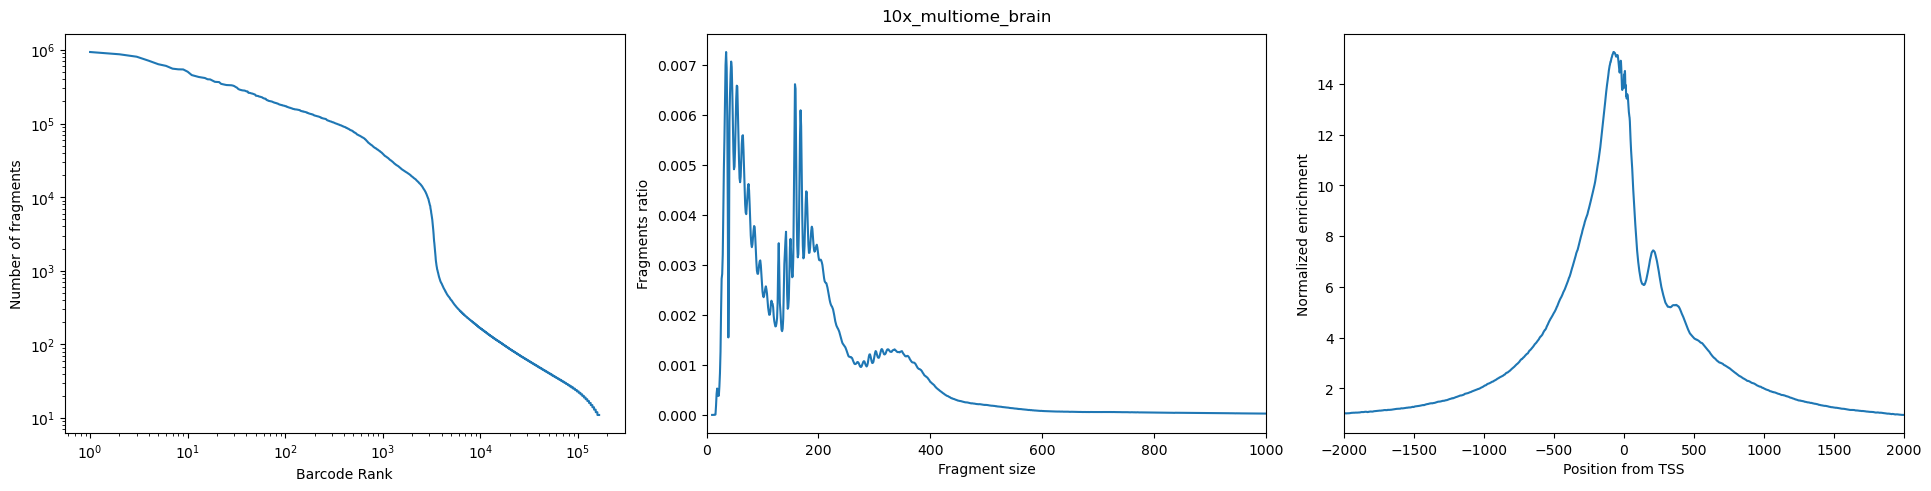

In [7]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )

In [8]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = None, # use automatic thresholding
            tss_enrichment_threshold = None, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

10x_multiome_brain:
	Using automatic threshold for unique fragments: 1500.1880245466896
	Using automatic threshold for TSS enrichment: 8.925504463029872


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/plotting/qc_plot.py:446: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


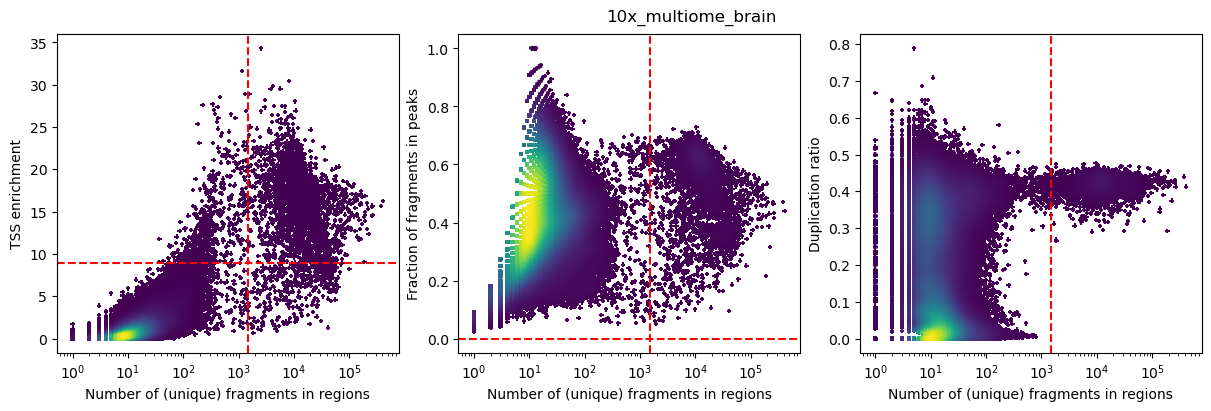

In [9]:
from pycisTopic.plotting.qc_plot import plot_barcode_stats

for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id]
    )

# Creating a cisTopic object

In [11]:
path_to_regions = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
path_to_blacklist = "blacklist/hg38-blacklist.v2.bed"
pycistopic_qc_output_dir = "outs/qc"

from pycisTopic.cistopic_class import create_cistopic_object_from_fragments
import polars as pl

cistopic_obj_list = []
for sample_id in fragments_dict:
    sample_metrics = pl.read_parquet(
        os.path.join(pycistopic_qc_output_dir, f'{sample_id}.fragments_stats_per_cb.parquet')
    ).to_pandas().set_index("CB").loc[ sample_id_to_barcodes_passing_filters[sample_id] ]
    cistopic_obj = create_cistopic_object_from_fragments(
        path_to_fragments = fragments_dict[sample_id],
        path_to_regions = path_to_regions,
        path_to_blacklist = path_to_blacklist,
        metrics = sample_metrics,
        valid_bc = sample_id_to_barcodes_passing_filters[sample_id],
        n_cpu = 1,
        project = sample_id,
        split_pattern = '-'
    )
    cistopic_obj_list.append(cistopic_obj)

2026-01-11 10:46:43,802 cisTopic     INFO     Reading data for 10x_multiome_brain
2026-01-11 10:48:08,464 cisTopic     INFO     metrics provided!
2026-01-11 10:48:12,567 cisTopic     INFO     Counting fragments in regions
2026-01-11 10:48:51,776 cisTopic     INFO     Creating fragment matrix
2026-01-11 10:49:30,168 cisTopic     INFO     Converting fragment matrix to sparse matrix
2026-01-11 10:49:34,189 cisTopic     INFO     Removing blacklisted regions
2026-01-11 10:49:35,112 cisTopic     INFO     Creating CistopicObject
2026-01-11 10:49:35,894 cisTopic     INFO     Done!


In [12]:
cistopic_obj = cistopic_obj_list[0]
print(cistopic_obj)

CistopicObject from project 10x_multiome_brain with n_cells × n_regions = 2843 × 436234


In [13]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Adding metadata to a cisTopic object


In [14]:
import pandas as pd
cell_data = pd.read_table("data/cell_data.tsv", index_col = 0)
cell_data.head()
cistopic_obj.add_cell_data(cell_data, split_pattern='-')
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [15]:
cistopic_obj.cell_data

cisTopic_nr_frag cisTopic_log_nr_frag  \
CACCTCAGTTGTAAAC-1-10x_multiome_brain            18300             4.262451   
TGACTCCTCATCCACC-1-10x_multiome_brain           100055             5.000239   
TTTCTCACATAAACCT-1-10x_multiome_brain            32192             4.507748   
GTCCTCCCACACAATT-1-10x_multiome_brain            88443             4.946663   
CTCCGTCCAGTTTGTG-1-10x_multiome_brain           131110             5.117636   
...                                                ...                  ...   
GCAGGTTGTCCAAATG-1-10x_multiome_brain             2770              3.44248   
AAGCTCCCAGCACCAT-1-10x_multiome_brain             2180             3.338456   
CAGAATCTCCTCATGC-1-10x_multiome_brain             1744             3.241546   
TAGCCGGGTAACAGGG-1-10x_multiome_brain             2674             3.427161   
GTGCGCAGTGCTTAGA-1-10x_multiome_brain             5859             3.767823   

                                      cisTopic_nr_acc cisTopic_log_nr_acc  \
CACCTCAGTTGTAAAC-1-10x_multiome_brain           15555             4.19187   
TGACTCCTCATCCACC-1-10x_multiome_brain           62282            4.794363   
TTTCTCACATAAACCT-1-10x_multiome_brain           27001             4.43138   
GTCCTCCCACACAATT-1-10x_multiome_brain           58296            4.765639   
CTCCGTCCAGTTTGTG-1-10x_multiome_brain           78509            4.894919   
...                                               ...                 ...   
GCAGGTTGTCCAAATG-1-10x_multiome_brain            2613            3.417139   
AAGCTCCCAGCACCAT-1-10x_multiome_brain            2040             3.30963   
CAGAATCTCCTCATGC-1-10x_multiome_brain            1681            3.225568   
TAGCCGGGTAACAGGG-1-10x_multiome_brain            2414            3.382737   
GTGCGCAGTGCTTAGA-1-10x_multiome_brain            5515            3.741546   

                                                sample_id  barcode_rank  \
CACCTCAGTTGTAAAC-1-10x_multiome_brain  10x_multiome_brain          1263   
TGACTCCTCATCCACC-1-10x_multiome_brain  10x_multiome_brain            93   
TTTCTCACATAAACCT-1-10x_multiome_brain  10x_multiome_brain           594   
GTCCTCCCACACAATT-1-10x_multiome_brain  10x_multiome_brain            97   
CTCCGTCCAGTTTGTG-1-10x_multiome_brain  10x_multiome_brain            54   
...                                                   ...           ...   
GCAGGTTGTCCAAATG-1-10x_multiome_brain  10x_multiome_brain          3258   
AAGCTCCCAGCACCAT-1-10x_multiome_brain  10x_multiome_brain          3148   
CAGAATCTCCTCATGC-1-10x_multiome_brain  10x_multiome_brain          3340   
TAGCCGGGTAACAGGG-1-10x_multiome_brain  10x_multiome_brain          3134   
GTGCGCAGTGCTTAGA-1-10x_multiome_brain  10x_multiome_brain          2451   

                                       total_fragments_count  \
CACCTCAGTTGTAAAC-1-10x_multiome_brain                  47941   
TGACTCCTCATCCACC-1-10x_multiome_brain                 311527   
TTTCTCACATAAACCT-1-10x_multiome_brain                 110849   
GTCCTCCCACACAATT-1-10x_multiome_brain                 325923   
CTCCGTCCAGTTTGTG-1-10x_multiome_brain                 405882   
...                                                      ...   
GCAGGTTGTCCAAATG-1-10x_multiome_brain                   7170   
AAGCTCCCAGCACCAT-1-10x_multiome_brain                   9905   
CAGAATCTCCTCATGC-1-10x_multiome_brain                   4638   
TAGCCGGGTAACAGGG-1-10x_multiome_brain                  10310   
GTGCGCAGTGCTTAGA-1-10x_multiome_brain                  25196   

                                       log10_total_fragments_count  \
CACCTCAGTTGTAAAC-1-10x_multiome_brain                     4.680716   
TGACTCCTCATCCACC-1-10x_multiome_brain                     5.493497   
TTTCTCACATAAACCT-1-10x_multiome_brain                     5.044736   
GTCCTCCCACACAATT-1-10x_multiome_brain                     5.513116   
CTCCGTCCAGTTTGTG-1-10x_multiome_brain                     5.608401   
...                                                            ...   
GCAG

# Running scrublet


In [16]:
import scrublet as scr
scrub = scr.Scrublet(cistopic_obj.fragment_matrix.T, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scrub.plot_histogram();
scrub.call_doublets(threshold=0.22)
scrub.plot_histogram();
scrublet = pd.DataFrame([scrub.doublet_scores_obs_, scrub.predicted_doublets_], columns=cistopic_obj.cell_names, index=['Doublet_scores_fragments', 'Predicted_doublets_fragments']).T

Preprocessing...


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.4%
Elapsed time: 30.3 seconds
Detected doublet rate = 23.5%
Estimated detectable doublet fraction = 68.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 34.5%


In [17]:
cistopic_obj.add_cell_data(scrublet, split_pattern = '-')
sum(cistopic_obj.cell_data.Predicted_doublets_fragments == True)

667

In [18]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [19]:
# Remove doublets
singlets = cistopic_obj.cell_data[cistopic_obj.cell_data.Predicted_doublets_fragments == False].index.tolist()
# Subset cisTopic object
cistopic_obj_noDBL = cistopic_obj.subset(singlets, copy=True, split_pattern='-')
print(cistopic_obj_noDBL)

CistopicObject from project 10x_multiome_brain with n_cells × n_regions = 2176 × 436229


In [20]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Run models


In [22]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

--2026-01-11 11:05:45--  https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
Resolving github.com (github.com)... 4.228.31.150
Connecting to github.com (github.com)|4.228.31.150|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/18378040/6a3fdbe6-0d3f-4f99-add3-1f98129f43cb?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-11T14%3A43%3A01Z&rscd=attachment%3B+filename%3DMallet-202108-bin.tar.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-11T13%3A42%3A11Z&ske=2026-01-11T14%3A43%3A01Z&sks=b&skv=2018-11-09&sig=7dCunVErs8cG0Dnu%2B6ZtDqKkJxk%2BnoWrS2K4qlrpE5o%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2ODE0MDY0OCwibmJmIjoxNzY4MTQwMzQ4LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJ

In [23]:
import os

# Define o caminho local (dentro da sua pasta de projeto)
mallet_output_dir = os.path.join(os.getcwd(), 'outs', 'mallet')


In [24]:
# Cria a pasta de forma segura (igual ao mkdir -p)
os.makedirs(mallet_output_dir, exist_ok=True)


In [ ]:
# RODE NO BASH
 
pip install lda
mamba install -c conda-forge openjdk

In [25]:
import os
from pycisTopic.lda_models import run_cgs_models_mallet

# 1. Ajuste a memória para algo que caiba no seu PC (Ex: 32GB)
# Se seu PC tiver 16GB de RAM total, coloque '12G' aqui.
os.environ['MALLET_MEMORY'] = '60G' 

# 2. Defina caminhos locais e seguros (baseados onde você está)
work_dir = os.getcwd()
mallet_output_dir = os.path.join(work_dir, 'outs', 'mallet_models')

# Cria a pasta caso não exista
os.makedirs(mallet_output_dir, exist_ok=True)

# 3. Caminho absoluto para o executável do Mallet
mallet_binary = os.path.join(work_dir, 'Mallet-202108', 'bin', 'mallet')

print(f"Salvando modelos em: {mallet_output_dir}")
print(f"Usando binário em: {mallet_binary}")

# 4. Run models
models = run_cgs_models_mallet(
    cistopic_obj,
    n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    n_cpu=8,         # Certifique-se que você tem 12 threads disponíveis
    n_iter=500,
    random_state=555,
    alpha=50,
    alpha_by_topic=True,
    eta=0.1,
    eta_by_topic=False,
    # CORREÇÃO AQUI: Usando sua pasta local, não a do cluster de Leuven
    tmp_path=mallet_output_dir, 
    save_path=mallet_output_dir,
    mallet_path=mallet_binary
)

/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-01-11 11:08:28,332	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Salvando modelos em: /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/mallet_models
Usando binário em: /home/victorffernandes/nscenicplus/scenicplus/myproject/Mallet-202108/bin/mallet
2026-01-11 11:08:28,427 cisTopic     INFO     Formatting input to corpus
2026-01-11 11:08:28,771 cisTopic     INFO     Running model with 2 topics
2026-01-11 11:08:28,772 LDAMalletWrapper INFO     Serializing temporary corpus to /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/mallet_models/corpus.txt
2026-01-11 11:08:46,546 LDAMalletWrapper INFO     Converting temporary corpus to MALLET format with: /home/victorffernandes/nscenicplus/scenicplus/myproject/Mallet-202108/bin/mallet import-file --preserve-case --keep-sequence --token-regex \S+ --input /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/mallet_models/corpus.txt --output /home/victorffernandes/nscenicplus/scenicplus/myproject/outs/mallet_models/corpus.mallet
2026-01-11 11:09:03,751 LDAMalletWrapper INFO     Tra

In [26]:
import pickle

pickle.dump(
    models,
    open(os.path.join(out_dir, "models.pkl"), "wb")
)

In [15]:
# Caso precise voltar a partir daqui

import pickle

# cisTopic object
with open("outs/cistopic_obj.pkl", "rb") as f:
    cistopic_obj = pickle.load(f)

# modelos LDA
with open("outs/models.pkl", "rb") as f:
    models = pickle.load(f)


# SELEÇÃO DE MODELOS

In [28]:
%matplotlib inline

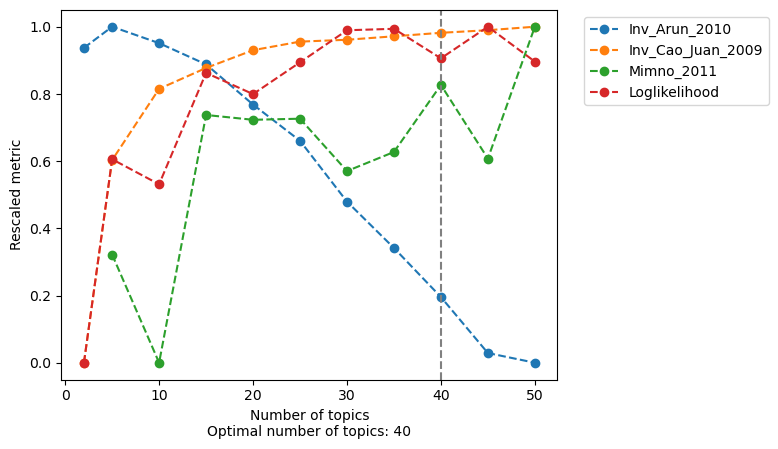

In [29]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    select_model = 40,
    return_model = True
)

In [30]:
cistopic_obj.add_LDA_model(model)

In [31]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# CLUSTERIZAÇÃO E VISUALIZAÇÃO


In [32]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [33]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.6, 1.2, 3],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2026-01-11 15:15:58,591 cisTopic     INFO     Finding neighbours


In [34]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2026-01-11 15:16:10,049 cisTopic     INFO     Running UMAP


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [35]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2026-01-11 15:16:24,473 cisTopic     INFO     Running TSNE


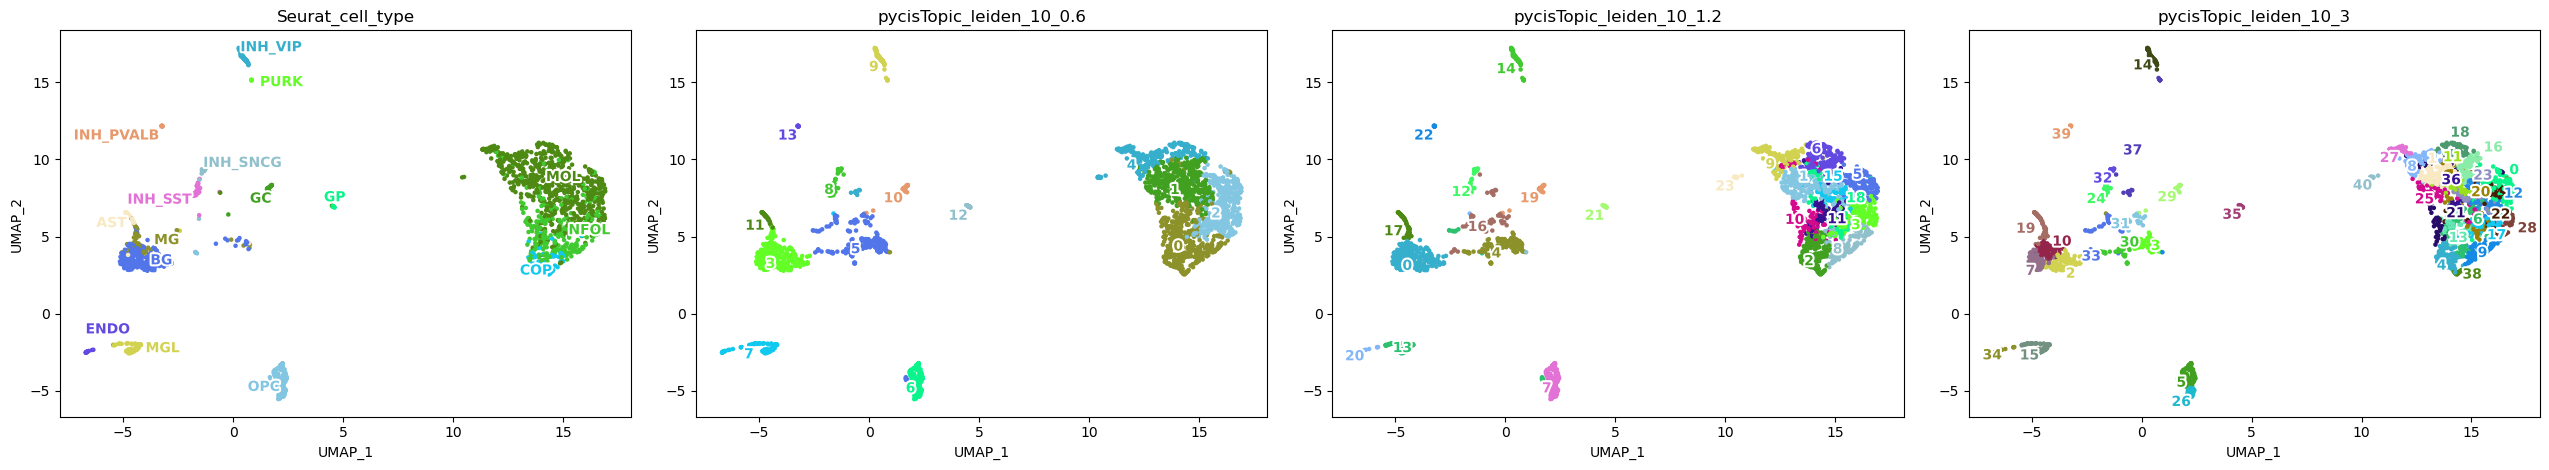

In [36]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['Seurat_cell_type', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [37]:
annot_dict = {}
for resolution in [0.6, 1.2, 3]:
    annot_dict[f"pycisTopic_leiden_10_{resolution}"] = {}
    for cluster in set(cistopic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"]):
        counts = cistopic_obj.cell_data.loc[
            cistopic_obj.cell_data.loc[cistopic_obj.cell_data[f"pycisTopic_leiden_10_{resolution}"] == cluster].index,
            "Seurat_cell_type"].value_counts()
        annot_dict[f"pycisTopic_leiden_10_{resolution}"][cluster] = f"{counts.index[counts.argmax()]}({cluster})"

In [38]:
annot_dict

{'pycisTopic_leiden_10_0.6': {'3': 'BG(3)',
  '0': 'NFOL(0)',
  '5': 'BG(5)',
  '1': 'MOL(1)',
  '4': 'MOL(4)',
  '11': 'AST(11)',
  '2': 'MOL(2)',
  '9': 'INH_VIP(9)',
  '13': 'INH_PVALB(13)',
  '12': 'GP(12)',
  '10': 'GC(10)',
  '6': 'OPC(6)',
  '8': 'INH_SST(8)',
  '7': 'MGL(7)'},
 'pycisTopic_leiden_10_1.2': {'3': 'MOL(3)',
  '4': 'BG(4)',
  '5': 'MOL(5)',
  '2': 'NFOL(2)',
  '0': 'BG(0)',
  '17': 'AST(17)',
  '1': 'MOL(1)',
  '9': 'MOL(9)',
  '6': 'MOL(6)',
  '8': 'NFOL(8)',
  '19': 'GC(19)',
  '18': 'MOL(18)',
  '14': 'INH_VIP(14)',
  '15': 'MOL(15)',
  '23': 'MOL(23)',
  '7': 'OPC(7)',
  '22': 'INH_PVALB(22)',
  '11': 'MOL(11)',
  '12': 'INH_SST(12)',
  '13': 'MGL(13)',
  '21': 'GP(21)',
  '10': 'NFOL(10)',
  '20': 'ENDO(20)',
  '16': 'INH_SST(16)'},
 'pycisTopic_leiden_10_3': {'3': 'BG(3)',
  '34': 'ENDO(34)',
  '33': 'MG(33)',
  '5': 'OPC(5)',
  '4': 'COP(4)',
  '38': 'COP(38)',
  '31': 'GC(31)',
  '2': 'BG(2)',
  '32': 'INH_SNCG(32)',
  '40': 'MOL(40)',
  '39': 'INH_PVALB(39

In [39]:
for resolution in [0.6, 1.2, 3]:
    cistopic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'] = [
        annot_dict[f'pycisTopic_leiden_10_{resolution}'][x] for x in cistopic_obj.cell_data[f'pycisTopic_leiden_10_{resolution}'].tolist()
    ]

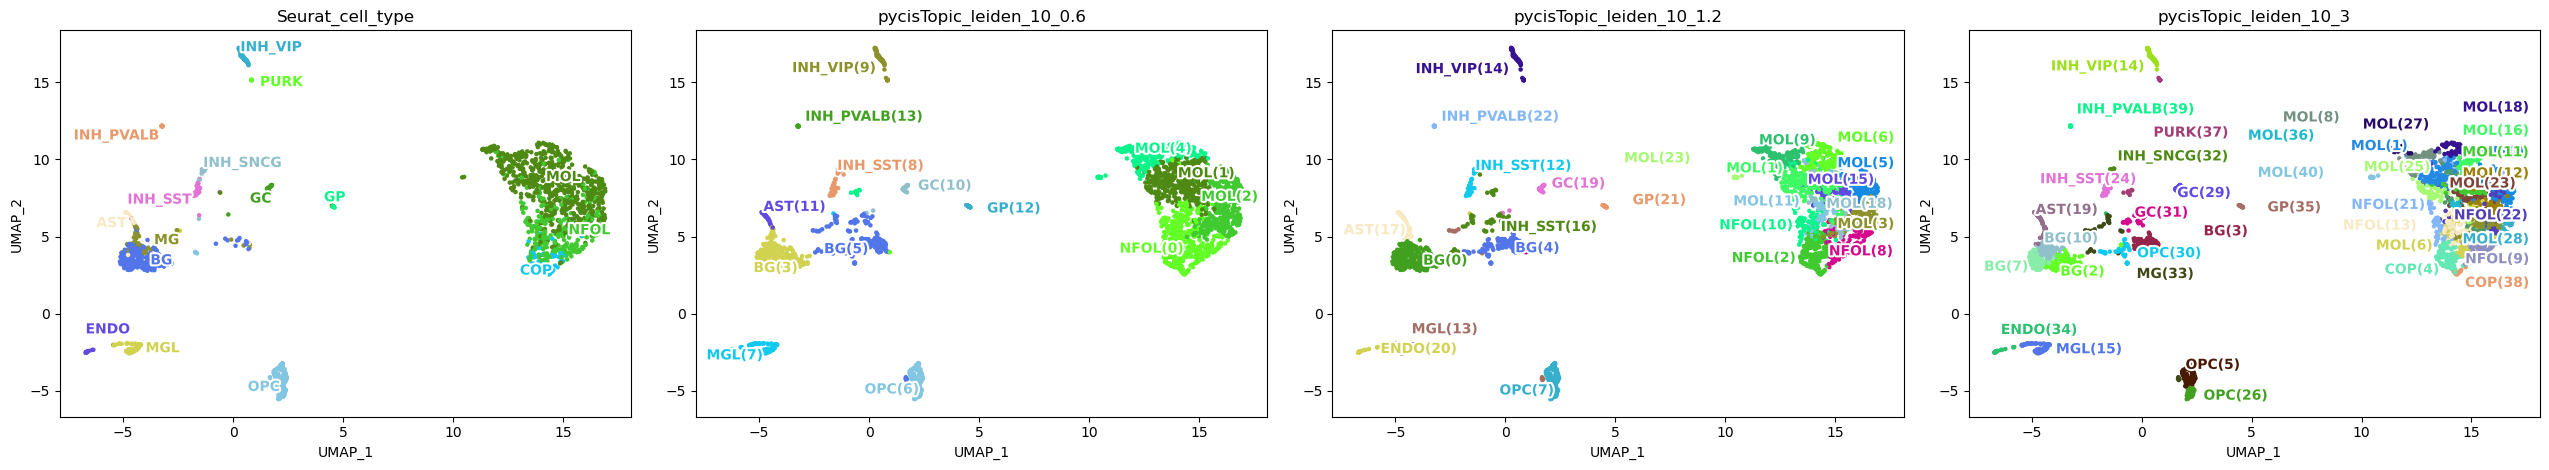

In [40]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['Seurat_cell_type', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

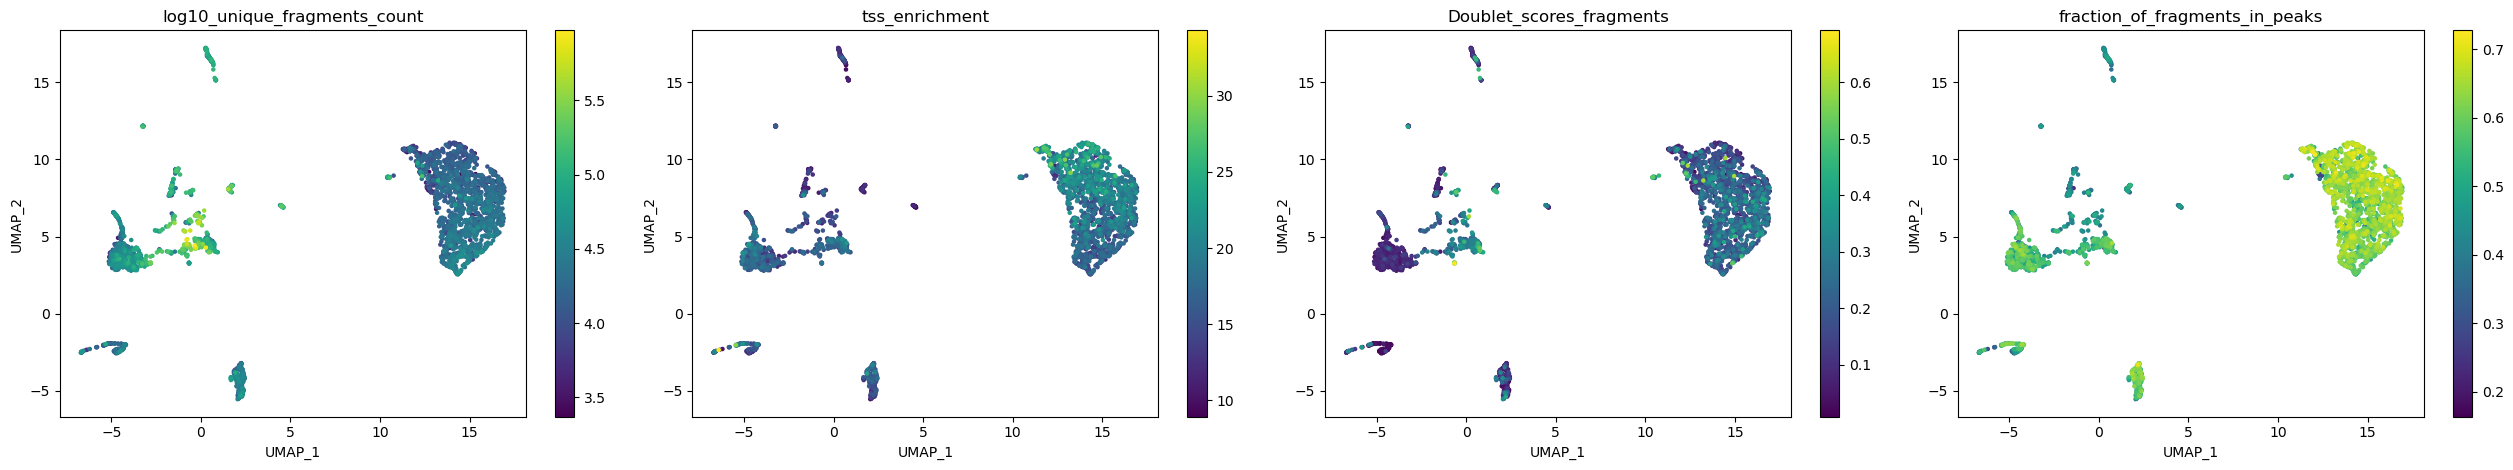

In [41]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['log10_unique_fragments_count', 'tss_enrichment', 'Doublet_scores_fragments', 'fraction_of_fragments_in_peaks'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

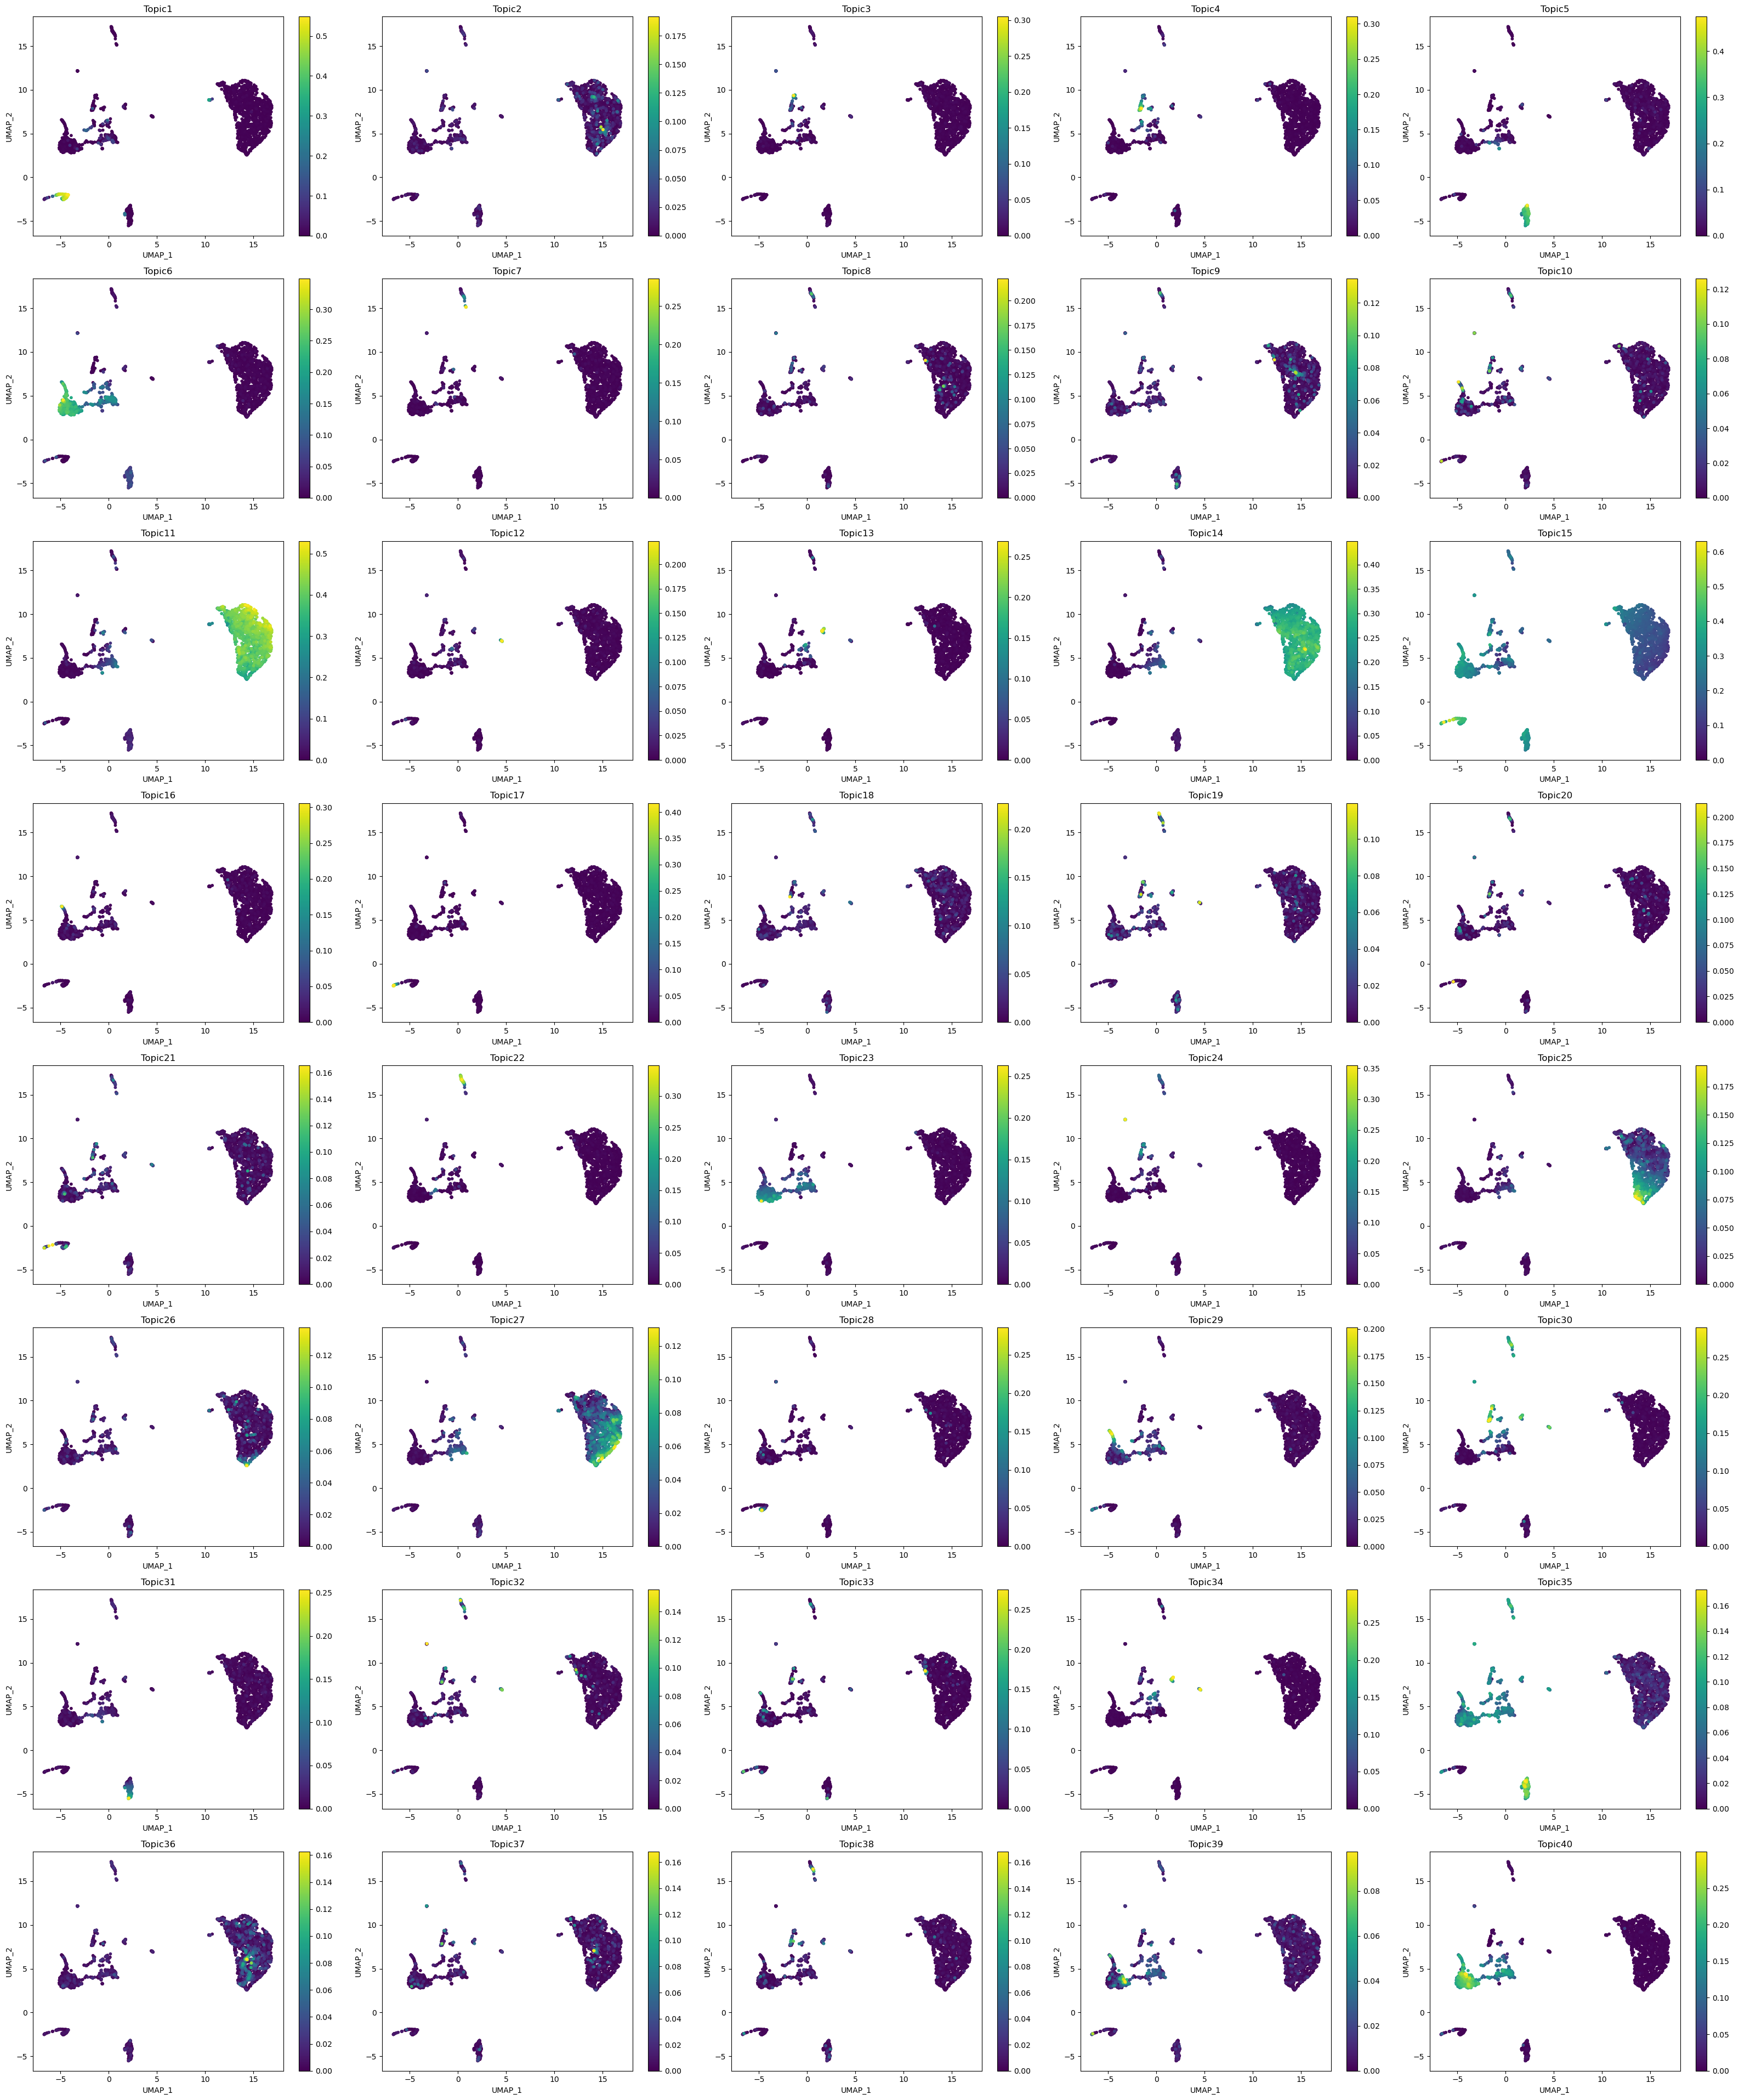

In [42]:
plot_topic(
    cistopic_obj,
    reduction_name = 'UMAP',
    target = 'cell',
    num_columns=5
)

# Topic binarization & QC


In [45]:
from pycisTopic.topic_binarization import binarize_topics


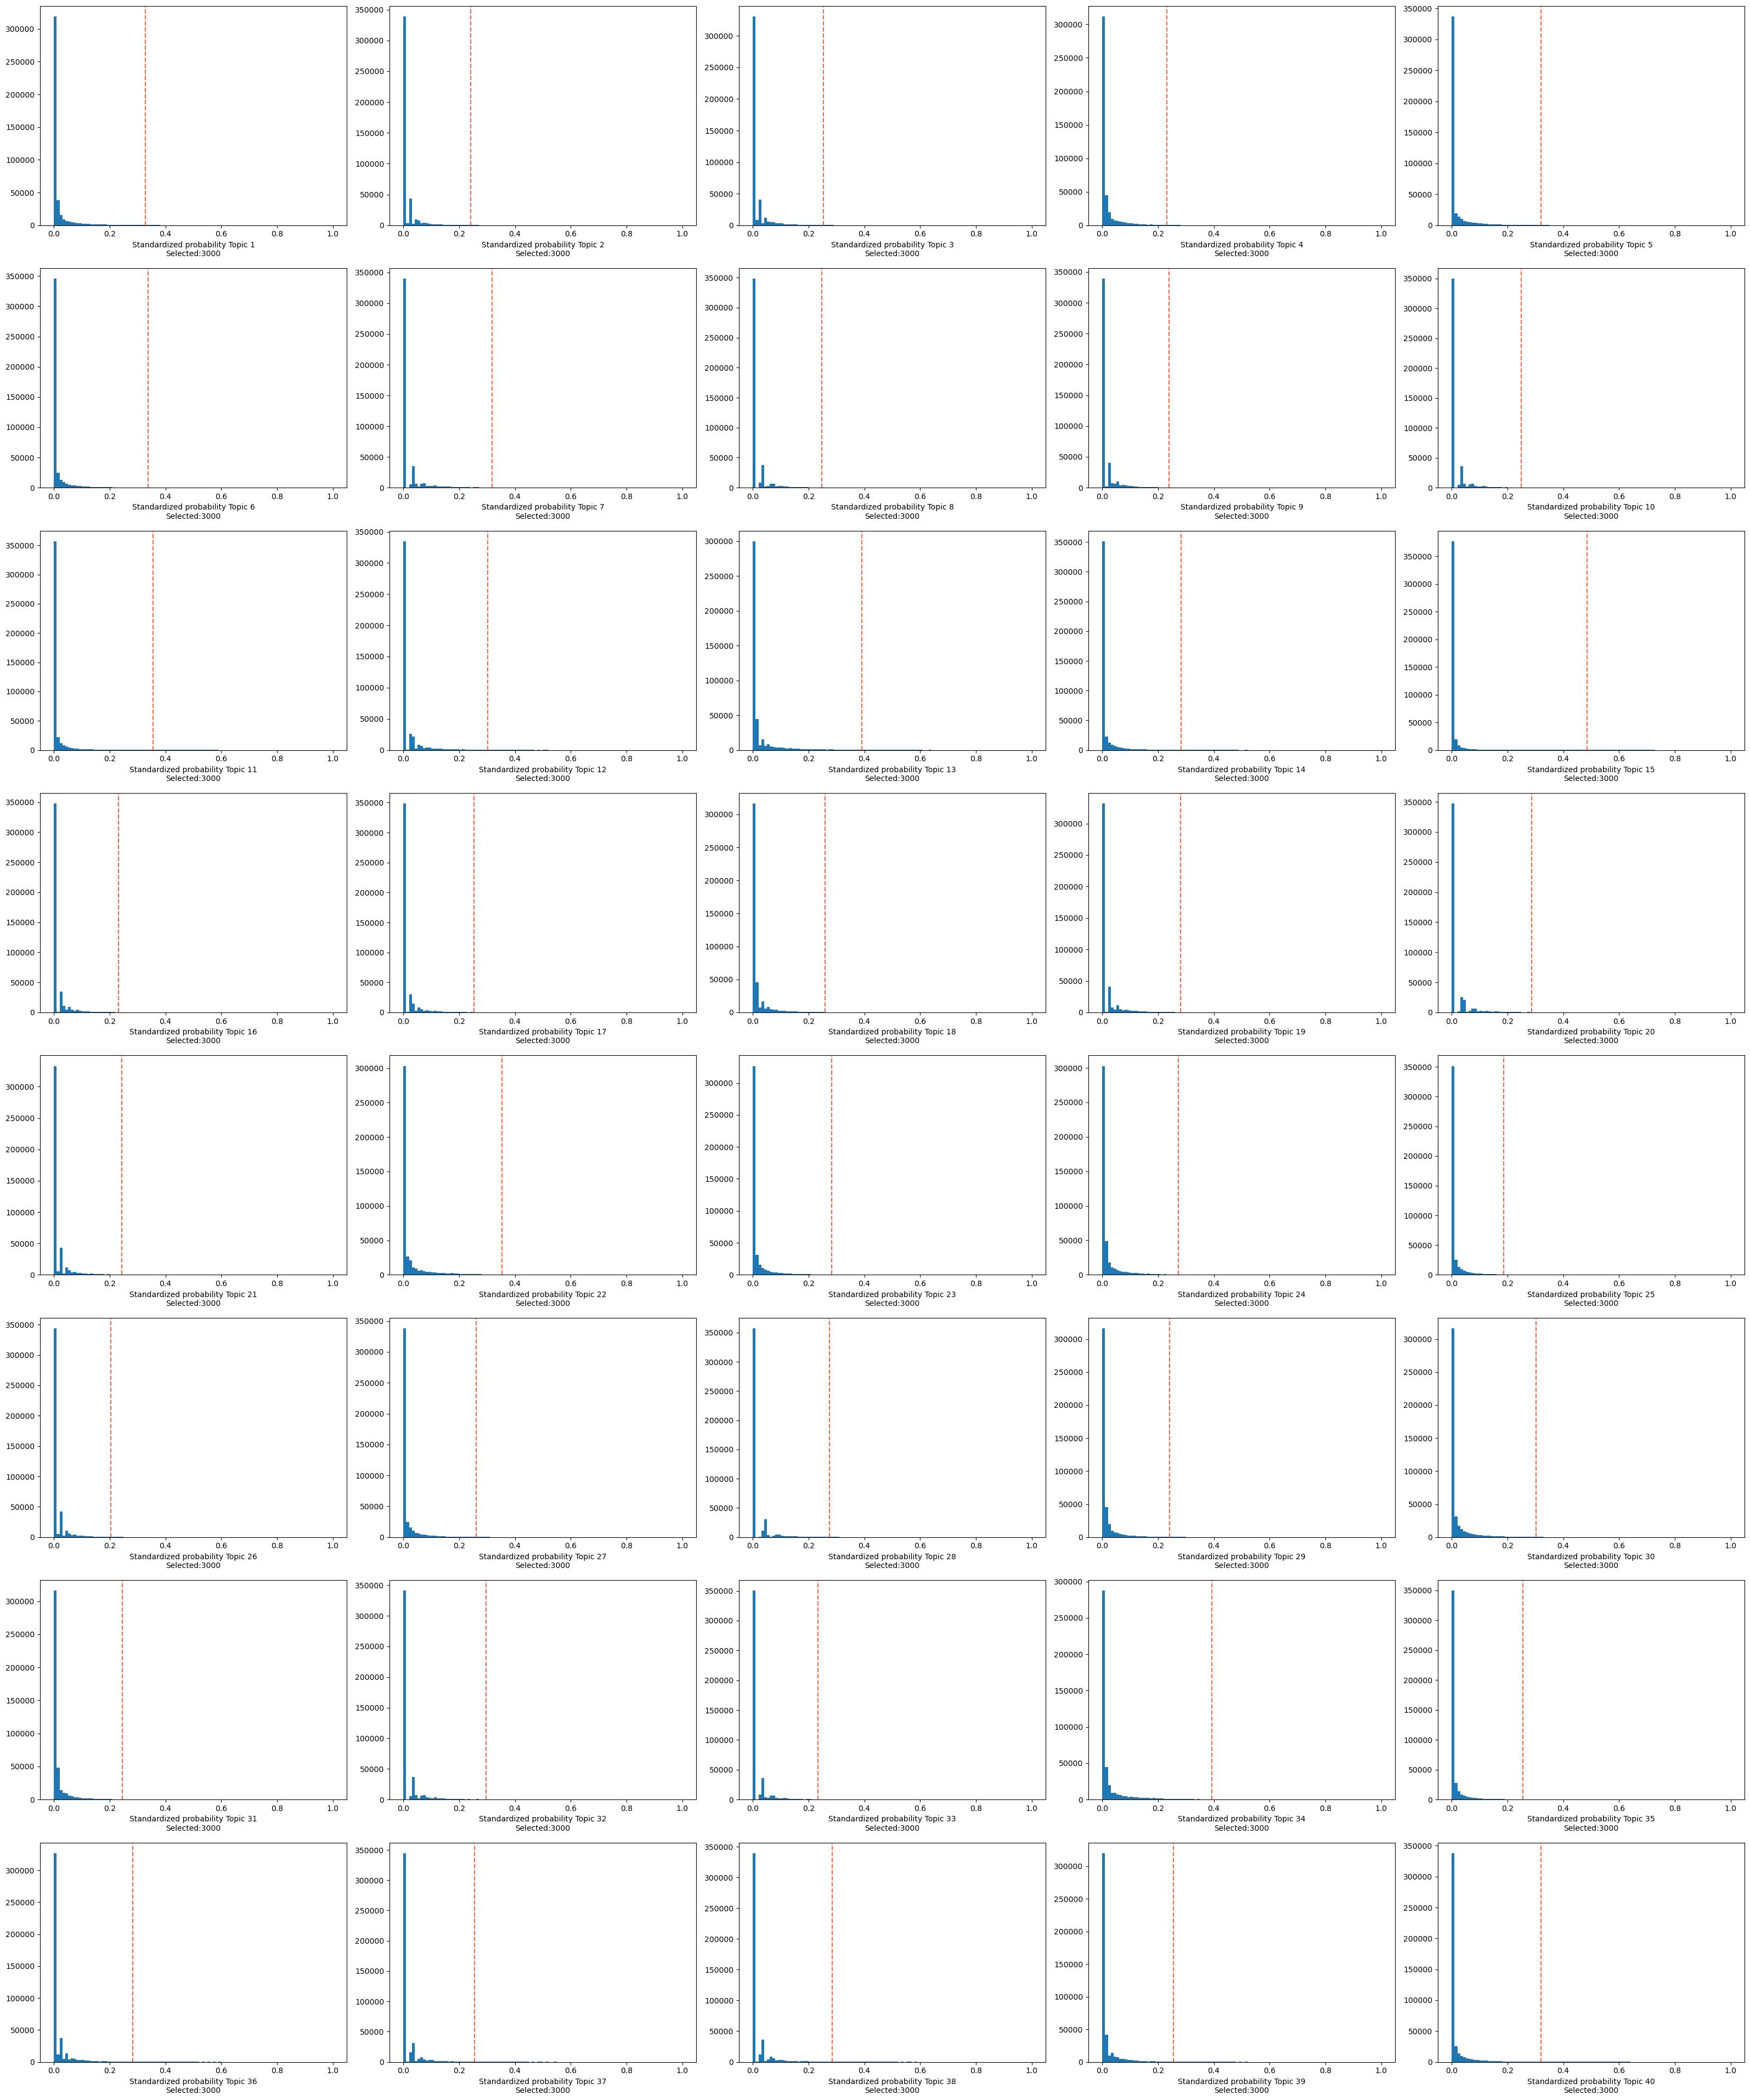

In [46]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

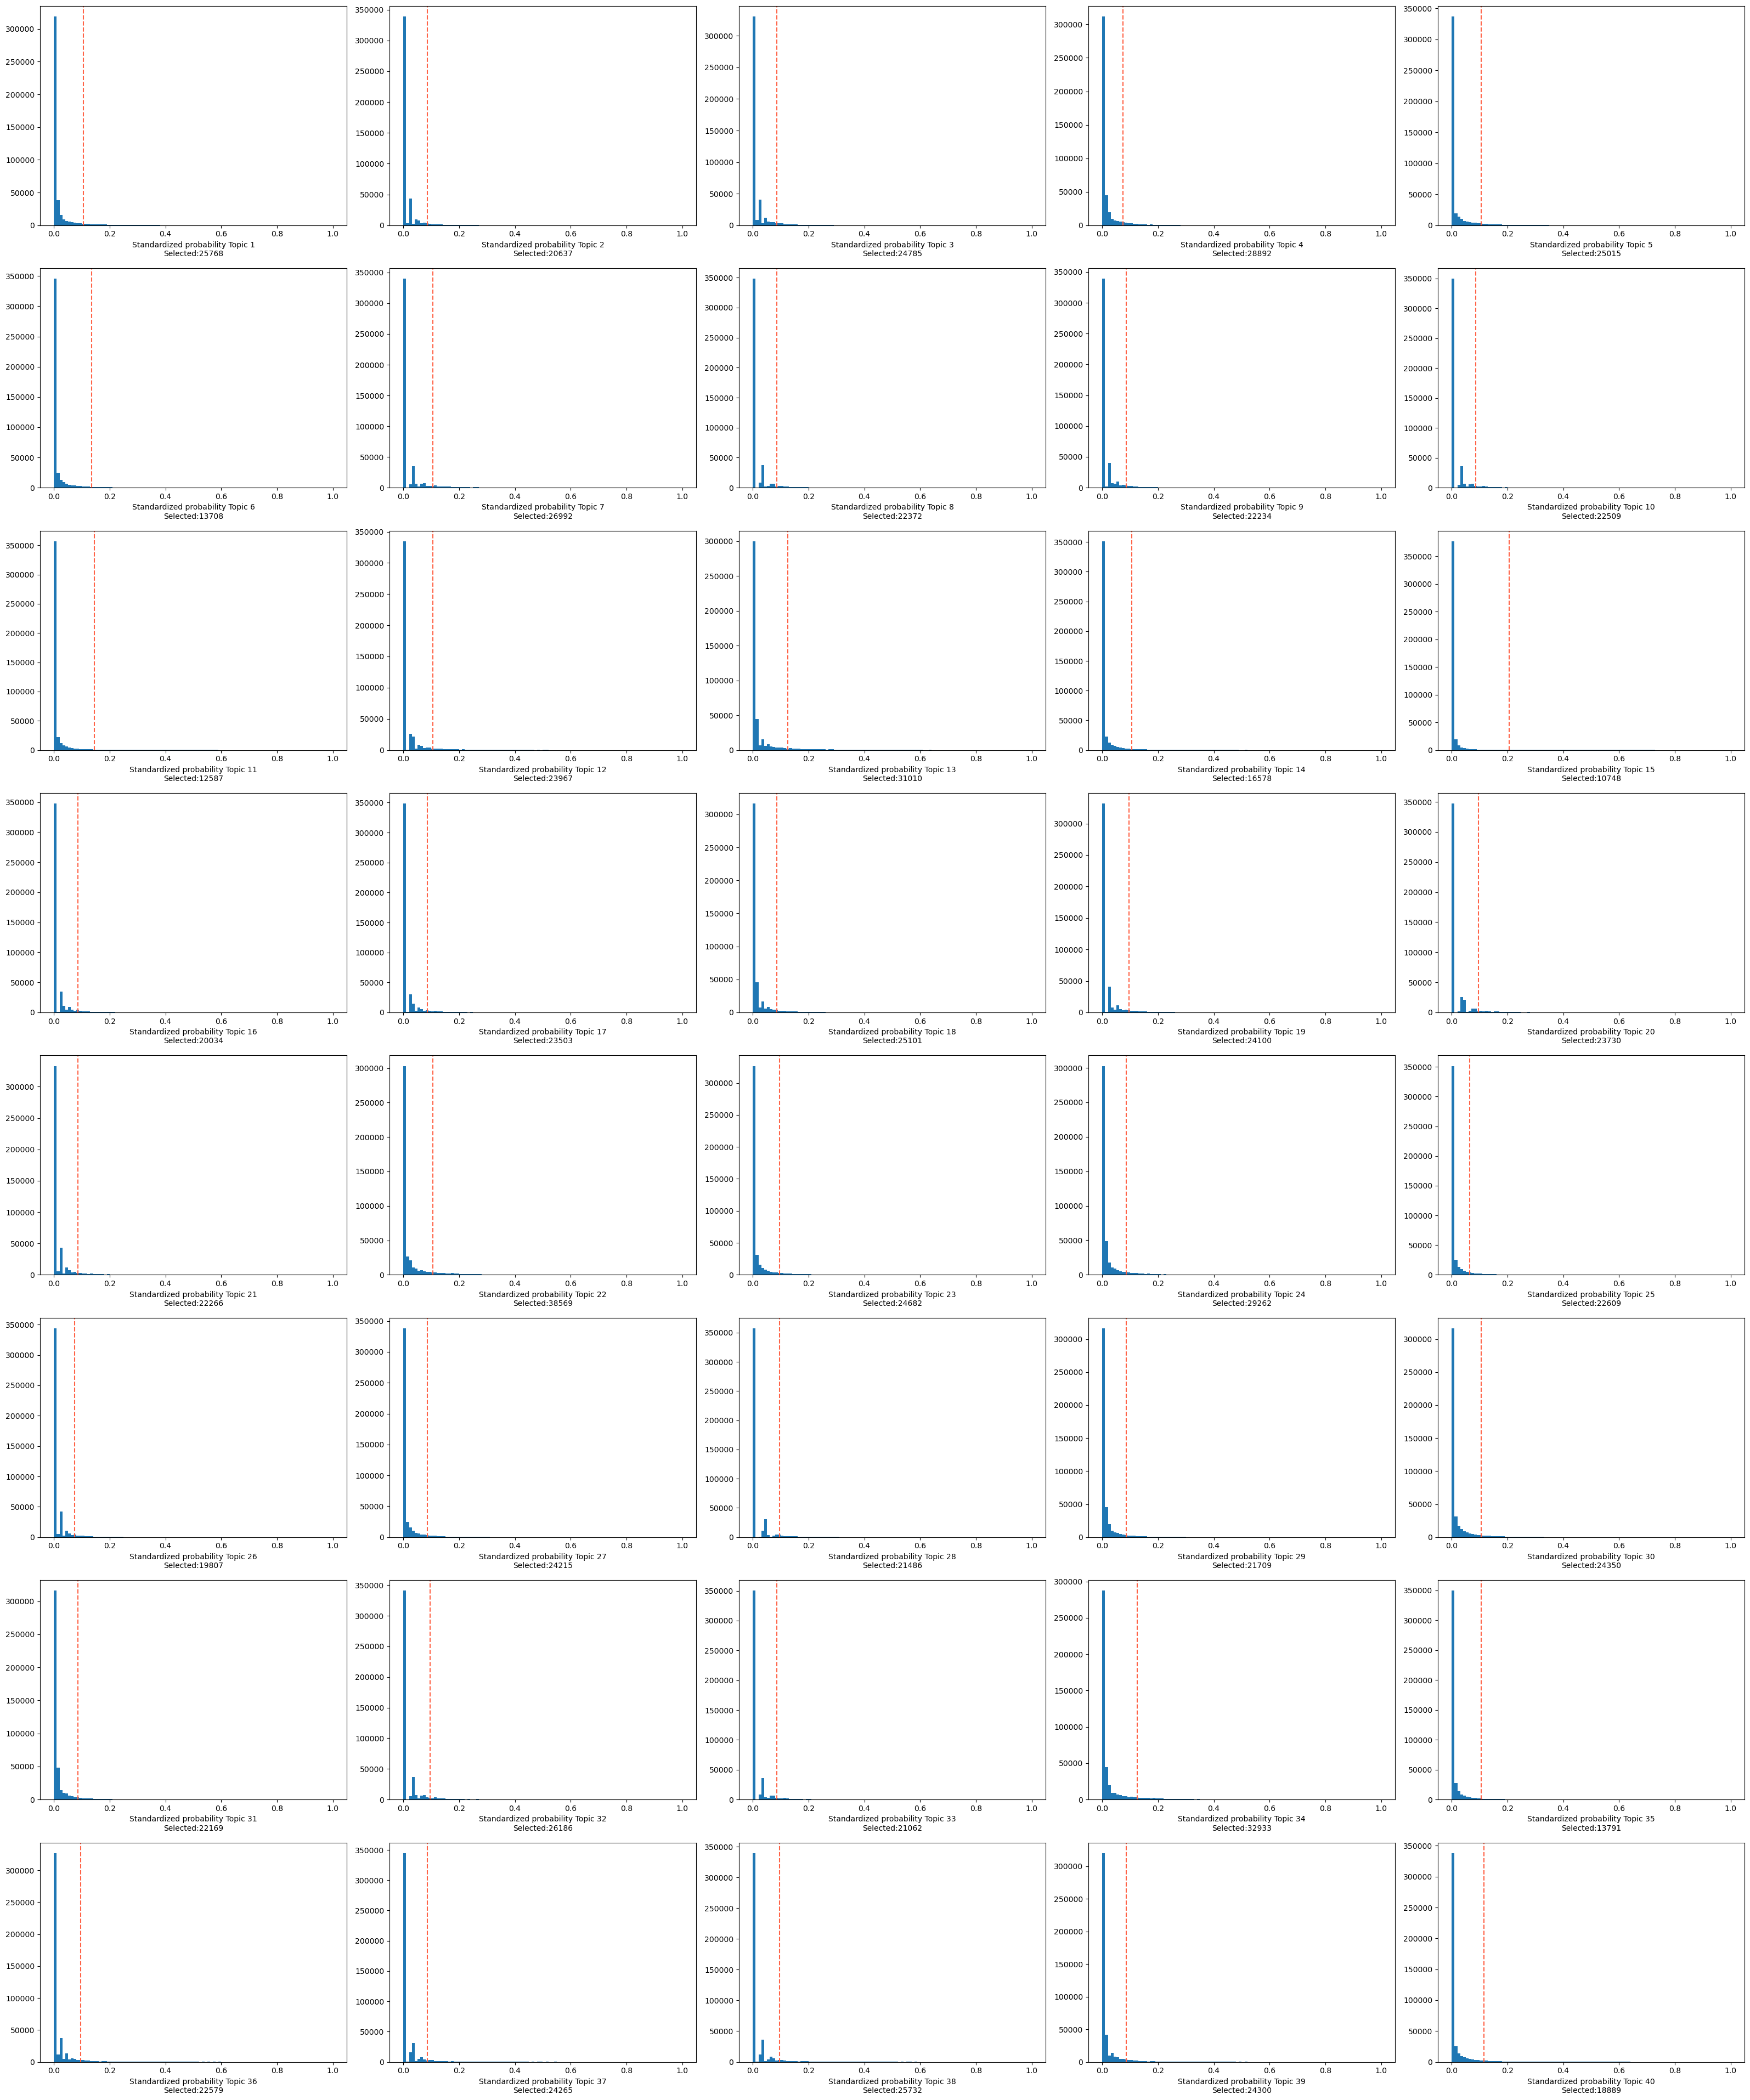

In [47]:
region_bin_topics_otsu = binarize_topics(
    cistopic_obj, method='otsu',
    plot=True, num_columns=5
)

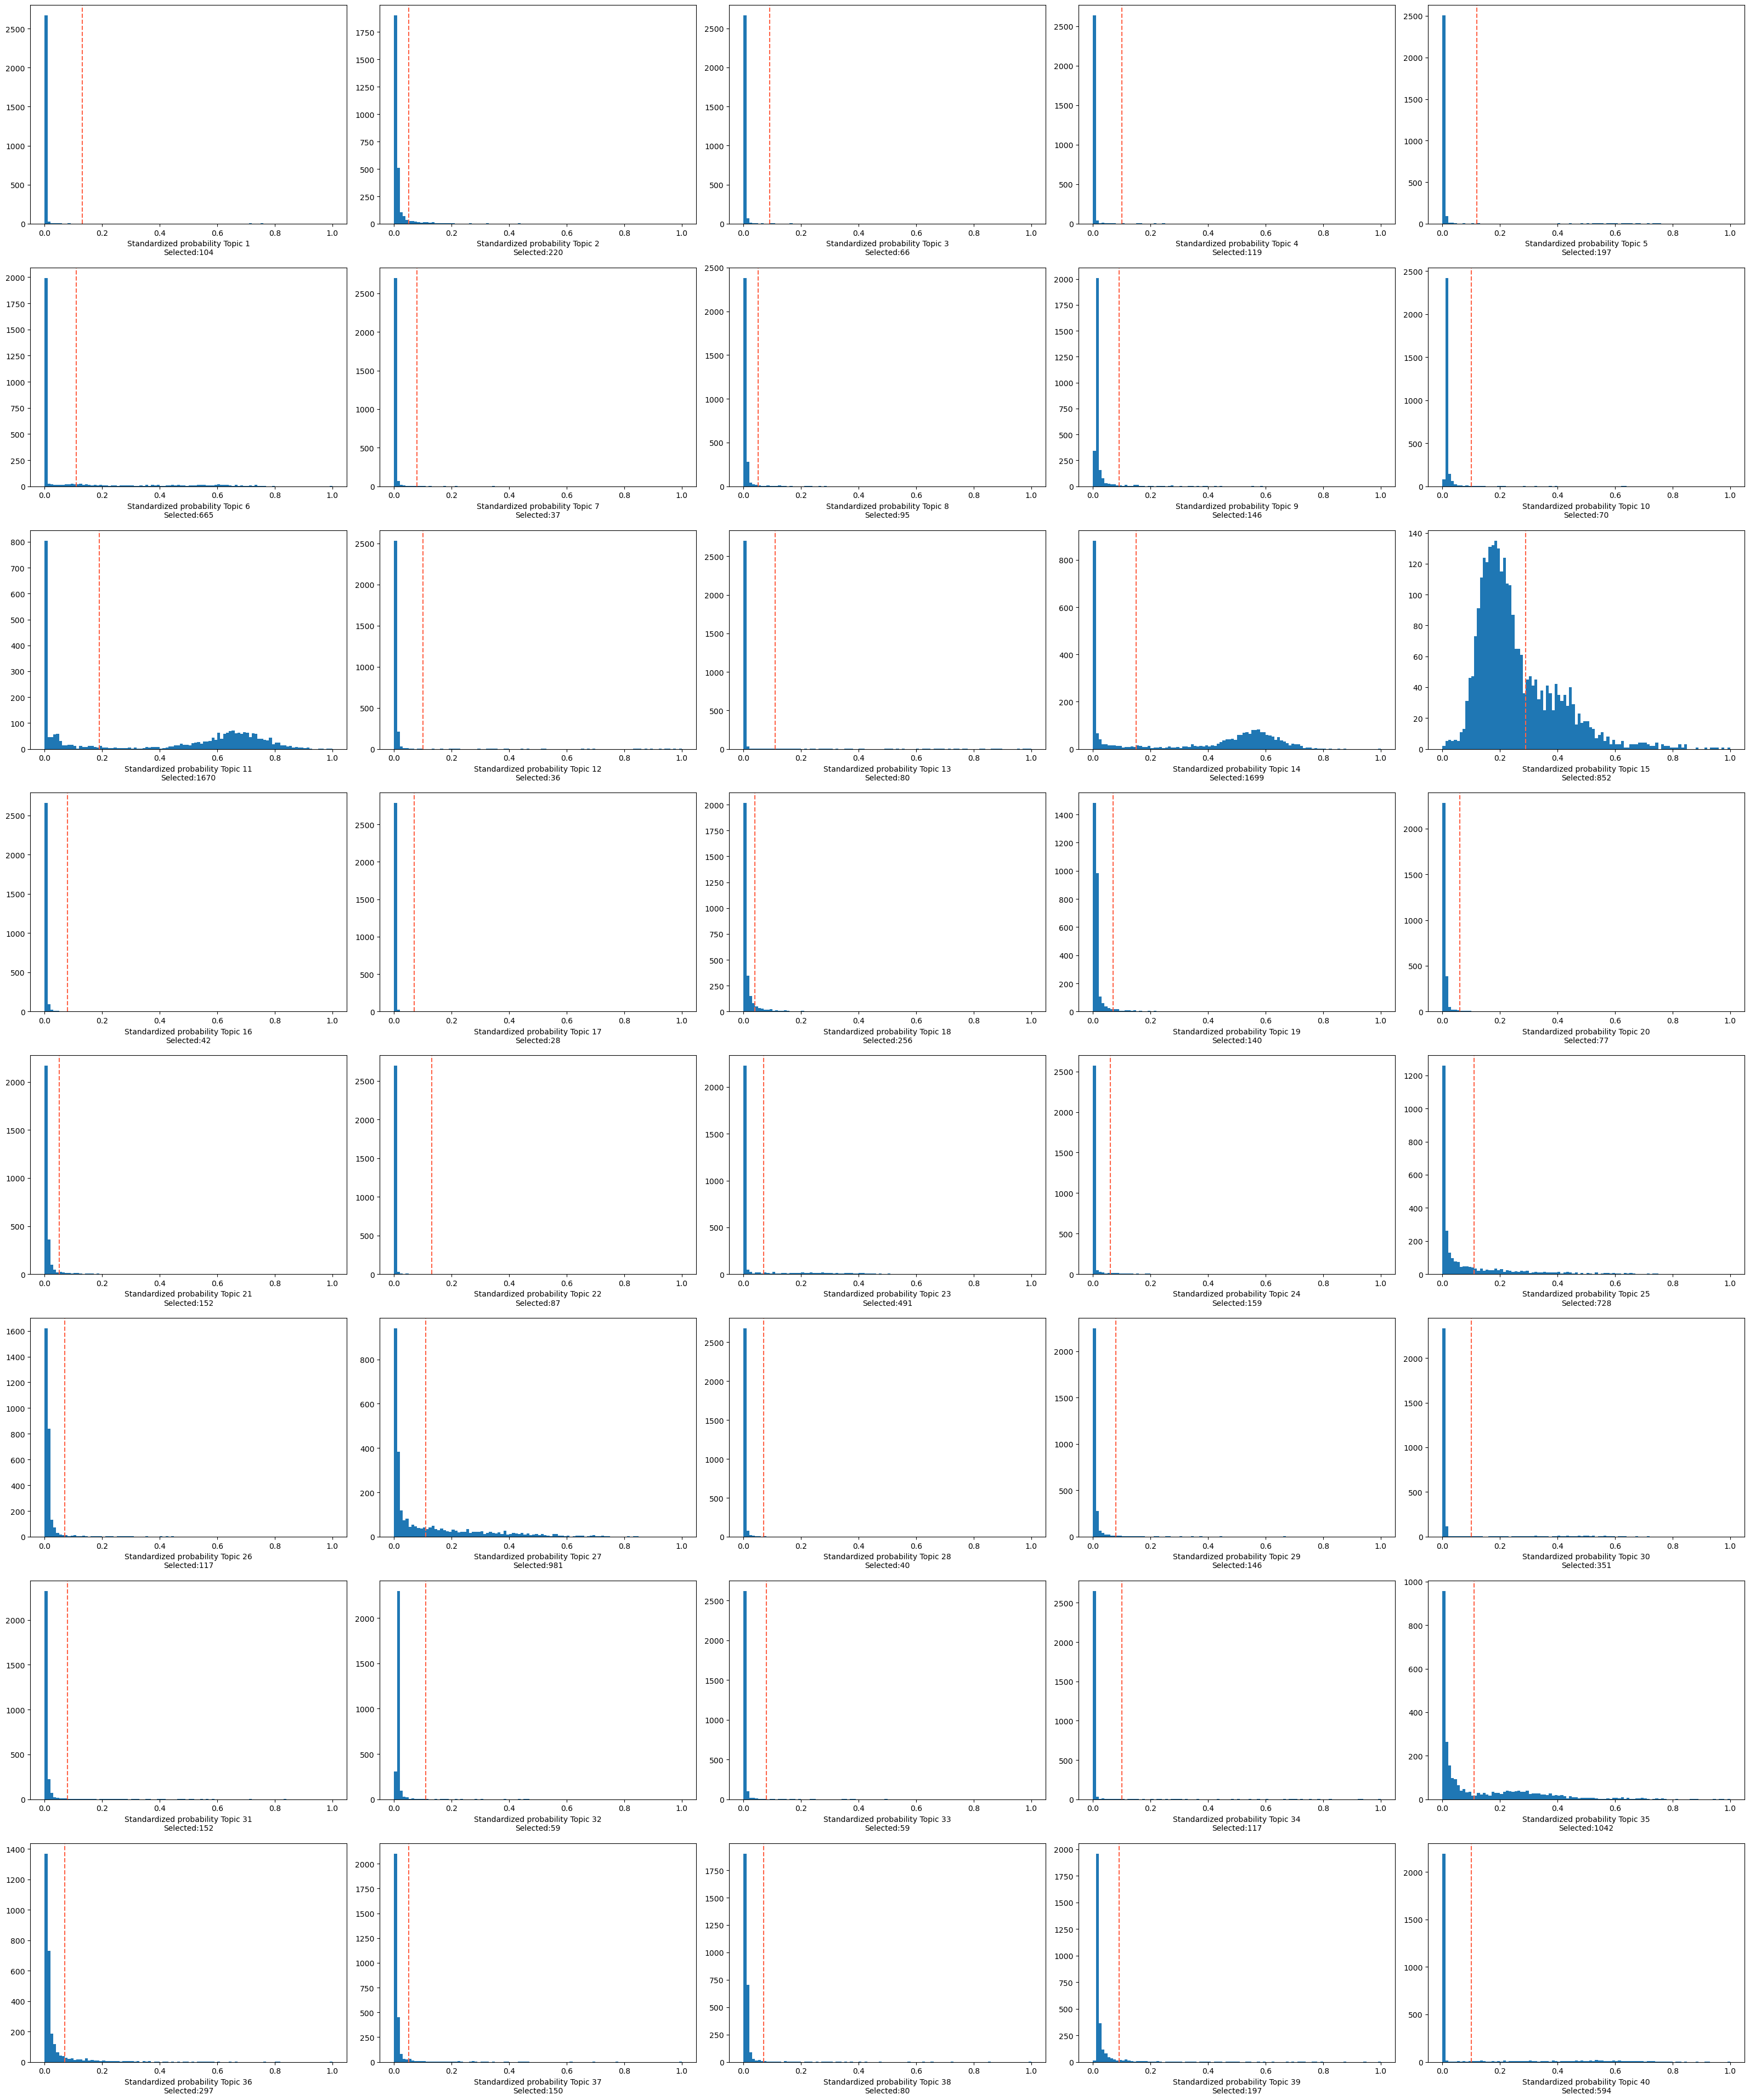

In [48]:
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [49]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [50]:
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [51]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

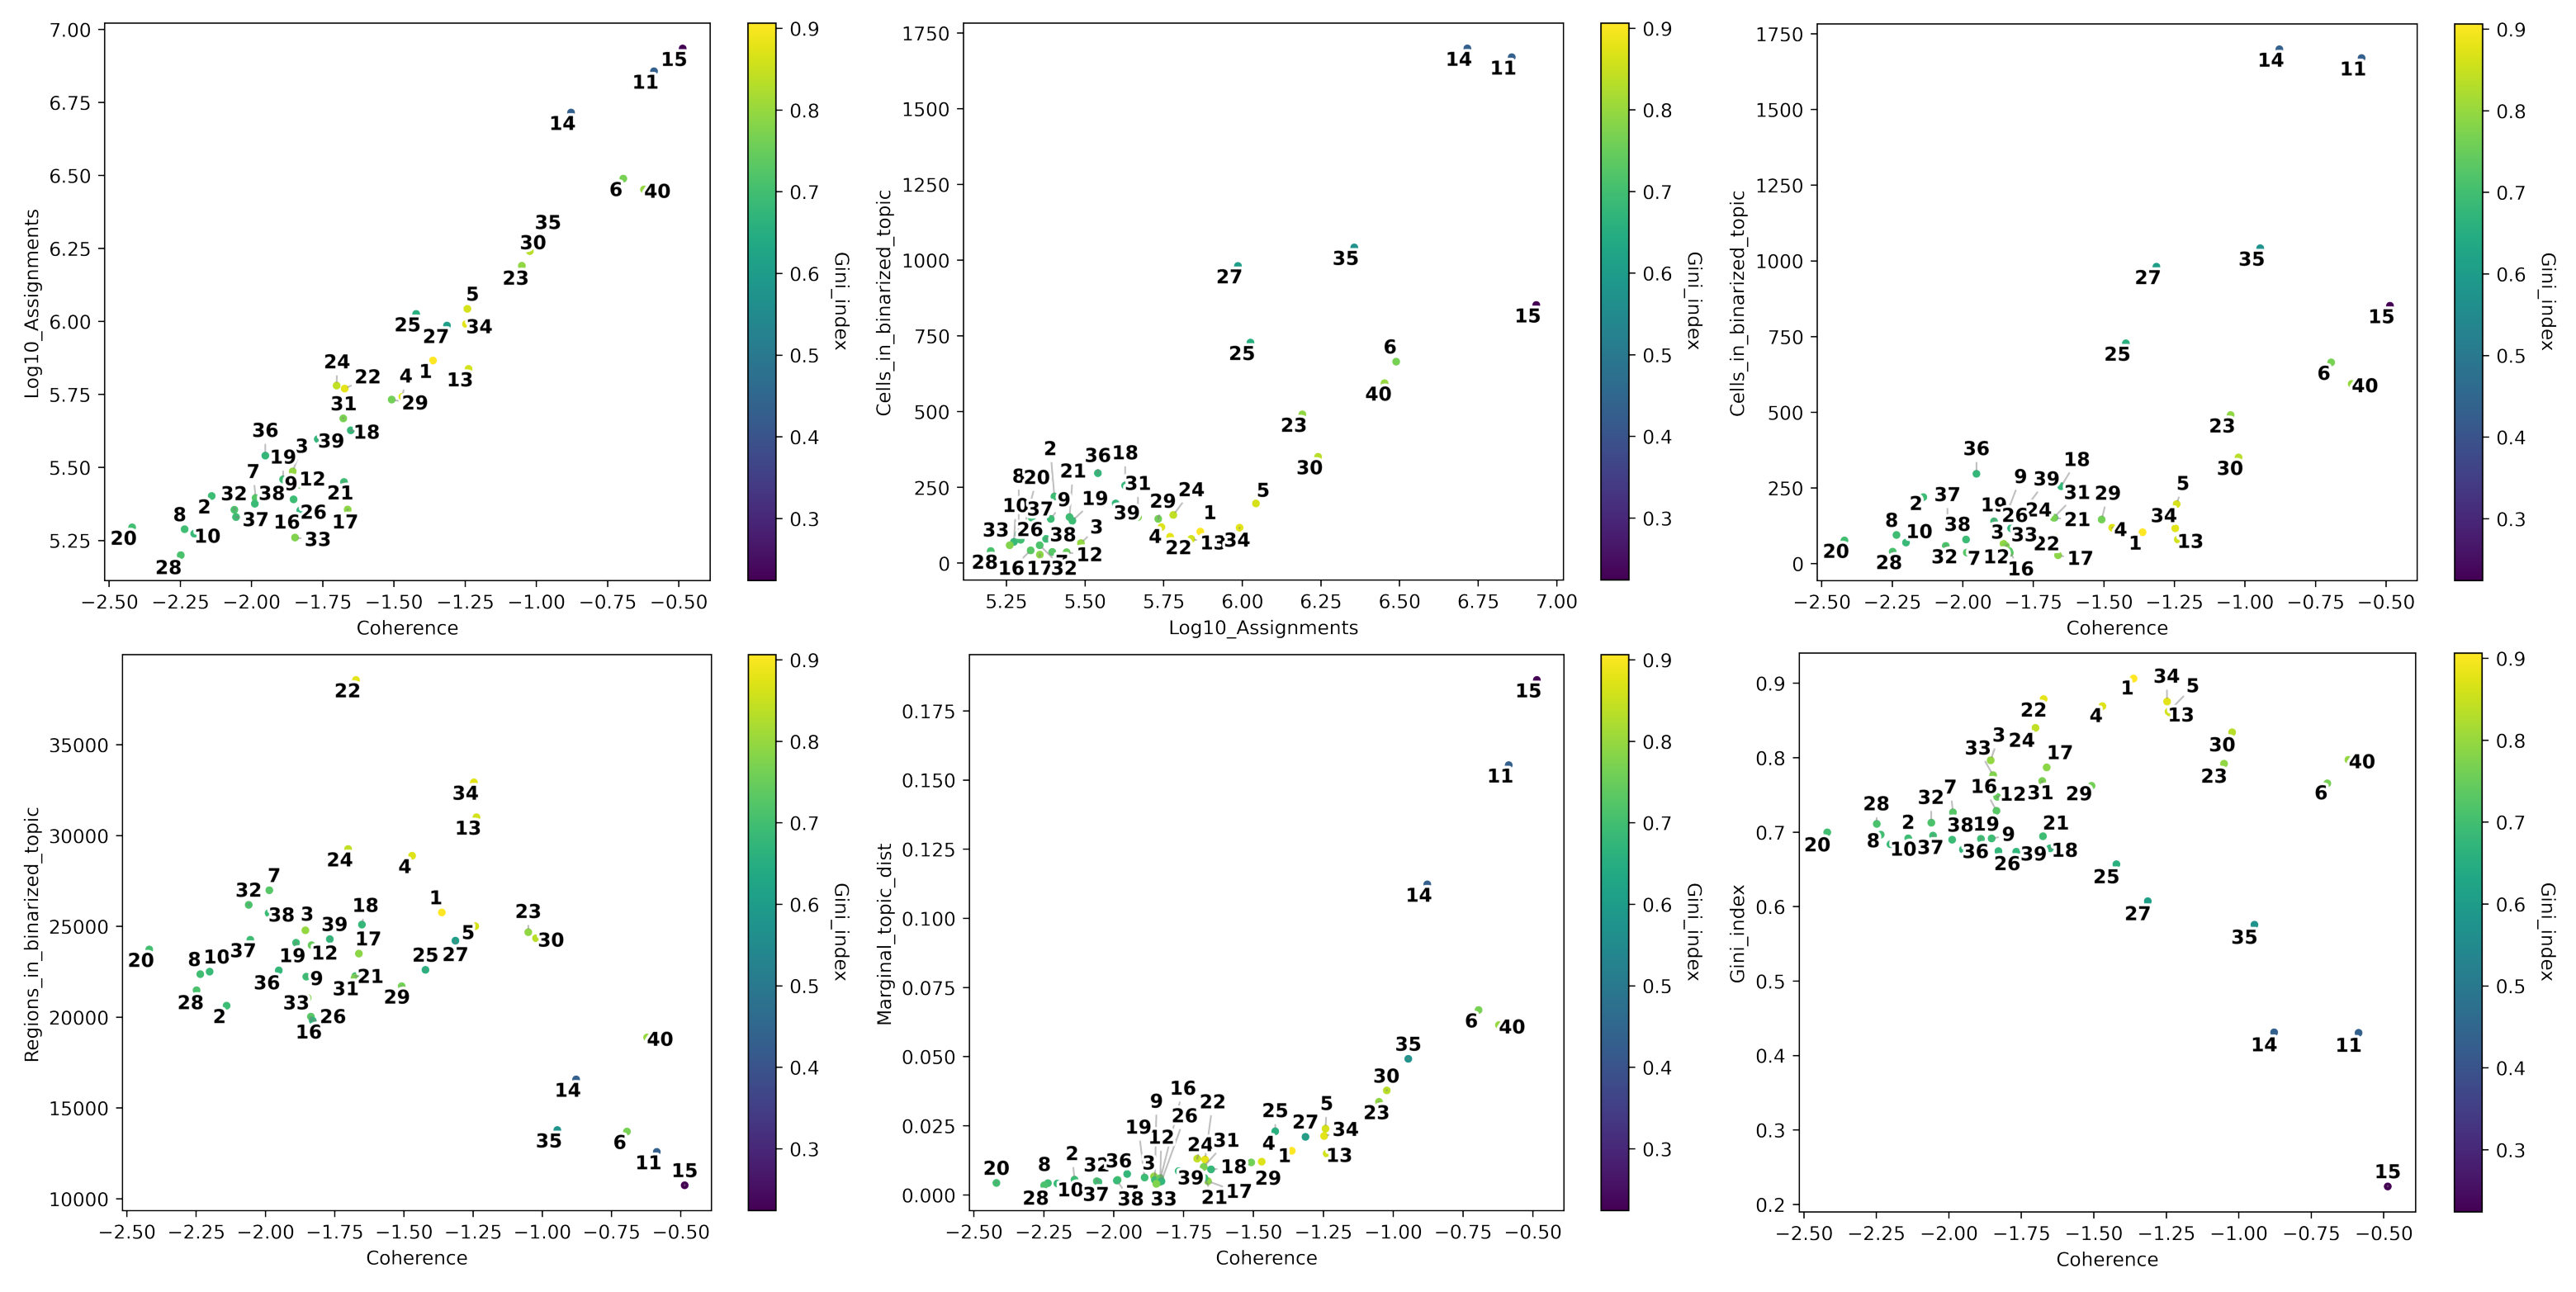

In [52]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

In [53]:
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='Seurat_cell_type',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


In [54]:
topic_annot

Seurat_cell_type  \
Topic1                                                 MGL   
Topic2                                           MOL, NFOL   
Topic3                        INH_SNCG, INH_PVALB, INH_SST   
Topic4                                   INH_SNCG, INH_SST   
Topic5                                                 OPC   
Topic6                                    MG, BG, OPC, AST   
Topic7                                       PURK, INH_VIP   
Topic8                                    INH_VIP, INH_SST   
Topic9                                            OPC, MOL   
Topic10                        MG, INH_PVALB, AST, INH_SST   
Topic11                                     MOL, NFOL, COP   
Topic12                                                 GP   
Topic13                                                 GC   
Topic14                                     MOL, NFOL, COP   
Topic15    MG, BG, OPC, MGL, ENDO, INH_PVALB, AST, INH_SST   
Topic16                                                AST   
Topic17                                               ENDO   
Topic18           PURK, INH_VIP, GC, INH_SNCG, GP, INH_SST   
Topic19                        PURK, INH_VIP, GC, INH_SNCG   
Topic20                                   INH_VIP, INH_SST   
Topic21          INH_VIP, GC, MGL, ENDO, INH_SNCG, INH_SST   
Topic22                                            INH_VIP   
Topic23                                             MG, BG   
Topic24        PURK, INH_VIP, INH_SNCG, INH_PVALB, INH_SST   
Topic25                                          NFOL, COP   
Topic26                                                COP   
Topic27                                     MOL, NFOL, COP   
Topic28                                                MGL   
Topic29                                  MG, BG, ENDO, AST   
Topic30  PURK, INH_VIP, GC, INH_SNCG, INH_PVALB, GP, IN...   
Topic31                                                OPC   
Topic32                     INH_VIP, INH_SNCG, GP, INH_SST   
Topic33                                   INH_VIP, INH_SST   
Topic34                                             GC, GP   
Topic35  PURK, MG, BG, INH_VIP, GC, OPC, ENDO, INH_SNCG...   
Topic36                                     MOL, NFOL, COP   
Topic37                                      MOL, INH_SNCG   
Topic38                         INH_VIP, INH_SNCG, INH_SST   
Topic39                                             MG, BG   
Topic40                                        MG, BG, AST   

        Ratio_cells_in_topic Ratio_group_in_population  is_general  
Topic1              0.036581                  0.022863       False  
Topic2              0.077383                  0.360183       False  
Topic3              0.023215                  0.037988       False  
Topic4              0.041857                   0.03236       False  
Topic5              0.069293                  0.059444       False  
Topic6              0.233908                  0.191347       False  
Topic7              0.013014                  0.029898       False  
Topic8              0.033415                  0.045726       False  
Topic9              0.051354                  0.321491       False  
Topic10             0.024622                  0.057686       False  
Topic11             0.587408                  0.383398        True  
Topic12             0.012663                  0.005628       False  
Topic13             0.028139                   0.01407       False  
Topic14             0.597608                  0.383398        True  
Topic15             0.299683                  0.244812       False  
Topic16             0.014773                  0.010552       False  
Topic17             0.009849                  0.005628       False  
Topic18             0.090046                  0.081956       False  
Topic19             0.049244                  0.056982       False  
Topic20             0.027084                  0.045726       False  
Topic21             0.053465                  0.10

# Differentially Accessible Regions (DARs)


In [55]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [56]:
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

2026-01-11 15:20:33,526 cisTopic     INFO     Imputing region accessibility
2026-01-11 15:20:33,527 cisTopic     INFO     Impute region accessibility for regions 0-20000
2026-01-11 15:20:34,409 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2026-01-11 15:20:34,604 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2026-01-11 15:20:34,795 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2026-01-11 15:20:34,991 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2026-01-11 15:20:35,198 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2026-01-11 15:20:35,410 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2026-01-11 15:20:35,605 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2026-01-11 15:20:35,794 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2026-01-11 15:20:35,980 cisTopic     

In [57]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2026-01-11 15:20:43,344 cisTopic     INFO     Normalizing imputed data
2026-01-11 15:20:52,084 cisTopic     INFO     Done!


2026-01-11 15:20:58,229 cisTopic     INFO     Calculating mean
2026-01-11 15:20:58,806 cisTopic     INFO     Calculating variance


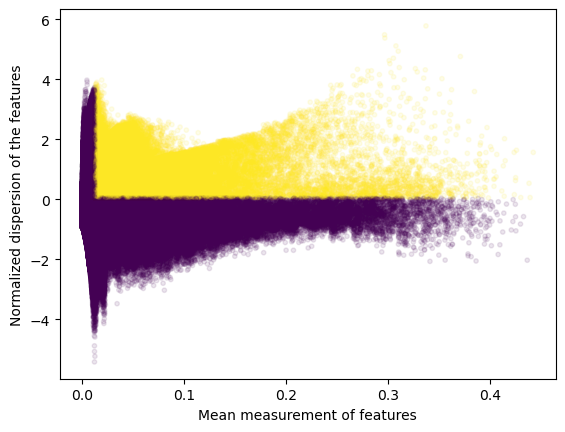

2026-01-11 15:21:13,349 cisTopic     INFO     Done!


In [58]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [59]:
len(variable_regions)

59968

In [60]:
import os
import shutil
import numpy as np
import ray
from pycisTopic.diff_features import find_diff_features

short_temp_dir = '/tmp/ray_cisTopic'

# Cria o diretório
os.makedirs(short_temp_dir, exist_ok=True)
print(f"Usando diretório temporário curto: {short_temp_dir}")

# 3. Executa a busca de features diferenciais
markers_dict = find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='Seurat_cell_type',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,               # Ajuste conforme seus núcleos disponíveis
    _temp_dir=short_temp_dir,  # <--- A CORREÇÃO PRINCIPAL ESTÁ AQUI
    split_pattern='-'
)

Usando diretório temporário curto: /tmp/ray_cisTopic


2026-01-11 15:21:35,674	INFO worker.py:2014 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2026-01-11 15:21:36,115 cisTopic     INFO     Subsetting data for AST (30 of 2843)


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/ray/_private/worker.py:2062: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(


2026-01-11 15:21:39,768 cisTopic     INFO     Computing p-value for AST
2026-01-11 15:21:45,484 cisTopic     INFO     Computing log2FC for AST
2026-01-11 15:21:48,104 cisTopic     INFO     AST done!
2026-01-11 15:21:48,106 cisTopic     INFO     Subsetting data for BG (282 of 2843)
2026-01-11 15:21:48,256 cisTopic     INFO     Computing p-value for BG
2026-01-11 15:21:53,097 cisTopic     INFO     Computing log2FC for BG
2026-01-11 15:21:53,144 cisTopic     INFO     BG done!
2026-01-11 15:21:53,146 cisTopic     INFO     Subsetting data for COP (66 of 2843)
2026-01-11 15:21:53,202 cisTopic     INFO     Computing p-value for COP
2026-01-11 15:21:58,033 cisTopic     INFO     Computing log2FC for COP
2026-01-11 15:21:58,073 cisTopic     INFO     COP done!
2026-01-11 15:21:58,074 cisTopic     INFO     Subsetting data for ENDO (16 of 2843)
2026-01-11 15:21:58,134 cisTopic     INFO     Computing p-value for ENDO
2026-01-11 15:22:02,393 cisTopic     INFO     Computing log2FC for ENDO
2026-01-11 

I0000 00:00:1768155777.752375  183331 chttp2_transport.cc:1182] ipv4:172.31.39.8:42025: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2026-01-11T15:22:57.752351228-03:00"}


In [61]:
from pycisTopic.clust_vis import plot_imputed_features

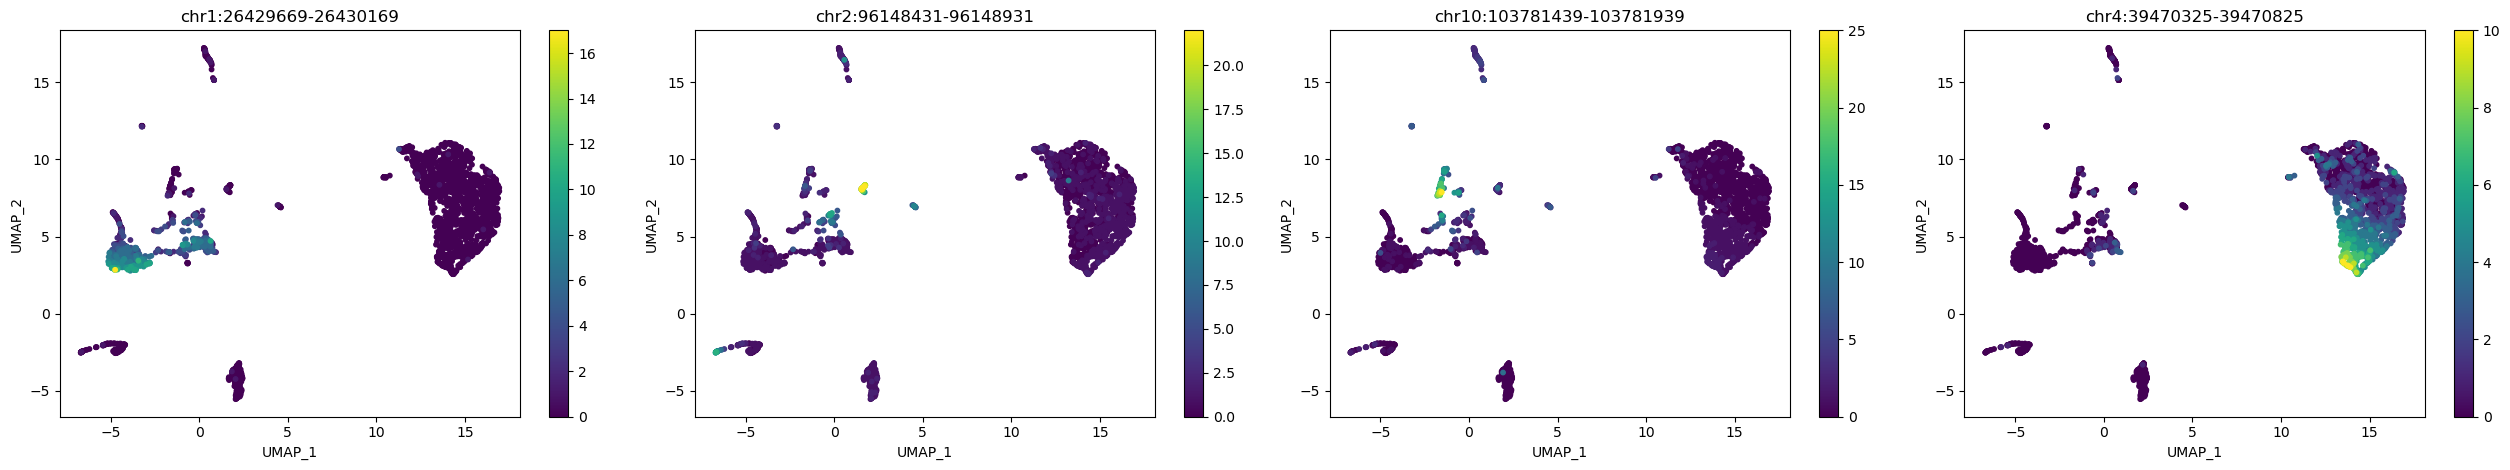

In [62]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=imputed_acc_obj,
    features=[markers_dict[x].index.tolist()[0] for x in ['BG', 'GC', 'INH_SST', 'COP']],
    scale=False,
    num_columns=4
)

In [63]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  AST: 23424
  BG: 26483
  COP: 10927
  ENDO: 8887
  GC: 12404
  GP: 11996
  INH_PVALB: 11573
  INH_SNCG: 12646
  INH_SST: 11768
  INH_VIP: 14133
  MG: 25255
  MGL: 9138
  MOL: 20624
  NFOL: 17085
  OPC: 17839
  PURK: 13485


# Save region sets


In [64]:
os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs_cell_type"), exist_ok = True)

In [65]:
from pycisTopic.utils import region_names_to_coordinates

In [66]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [67]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [68]:
for cell_type in markers_dict:
    region_names_to_coordinates(
        markers_dict[cell_type].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "DARs_cell_type", f"{cell_type}.bed"),
        sep = "\t",
        header = False, index = False
    )

# Gene activity


In [69]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity
import pandas as pd
import os

In [70]:
chromsizes = pd.read_table(os.path.join(out_dir, "qc", "hg38.chrom_sizes_and_alias.tsv"))
chromsizes

# ucsc     length             ensembl     refseq_id  genbank_id
0                chr1  248956422                   1  NC_000001.11  CM000663.2
1                chr2  242193529                   2  NC_000002.12  CM000664.2
2                chr3  198295559                   3  NC_000003.12  CM000665.2
3                chr4  190214555                   4  NC_000004.12  CM000666.2
4                chr5  181538259                   5  NC_000005.10  CM000667.2
..                ...        ...                 ...           ...         ...
449  chrUn_KI270539v1        993  HSCHRUN_RANDOM_146   NT_187442.1  KI270539.1
450  chrUn_KI270385v1        990  HSCHRUN_RANDOM_195   NT_187487.1  KI270385.1
451  chrUn_KI270423v1        981  HSCHRUN_RANDOM_121   NT_187417.1  KI270423.1
452  chrUn_KI270392v1        971  HSCHRUN_RANDOM_193   NT_187485.1  KI270392.1
453  chrUn_KI270394v1        970  HSCHRUN_RANDOM_187   NT_187479.1  KI270394.1

[454 rows x 5 columns]

In [71]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [72]:
chromsizes

+------------------------+-----------+-----------+
| Chromosome             | Start     | End       |
| (category)             | (int64)   | (int64)   |
|------------------------+-----------+-----------|
| chr1                   | 0         | 248956422 |
| chr1_GL383518v1_alt    | 0         | 182439    |
| chr1_GL383519v1_alt    | 0         | 110268    |
| chr1_GL383520v2_alt    | 0         | 366580    |
| ...                    | ...       | ...       |
| chrX_KI270881v1_alt    | 0         | 144206    |
| chrX_KI270913v1_alt    | 0         | 274009    |
| chrY                   | 0         | 57227415  |
| chrY_KI270740v1_random | 0         | 37240     |
+------------------------+-----------+-----------+
Unstranded PyRanges object has 454 rows and 3 columns from 454 chromosomes.
For printing, the PyRanges was sorted on Chromosome.

In [73]:
pr_annotation = pd.read_table(
        os.path.join(out_dir, "qc", "tssnew.bed")
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

+--------------+-----------+-----------+------------+------------+-------+
| Chromosome   | Start     | End       | Gene       | Score      | +4    |
| (category)   | (int64)   | (int64)   | (object)   | (object)   | ...   |
|--------------+-----------+-----------+------------+------------+-------|
| GL000009.2   | 58375     | 58376     | nan        | .          | ...   |
| GL000194.1   | 115017    | 115018    | nan        | .          | ...   |
| GL000194.1   | 115054    | 115055    | MAFIP      | .          | ...   |
| GL000195.1   | 49163     | 49164     | nan        | .          | ...   |
| ...          | ...       | ...       | ...        | ...        | ...   |
| chrY         | 19744948  | 19744949  | KDM5D      | .          | ...   |
| chrY         | 19744762  | 19744763  | KDM5D      | .          | ...   |
| chrY         | 19744742  | 19744743  | KDM5D      | .          | ...   |
| chrY         | 19744721  | 19744722  | KDM5D      | .          | ...   |
+--------------+-----------+-----------+------------+------------+-------+
Stranded PyRanges object has 172,021 rows and 9 columns from 407 chromosomes.
For printing, the PyRanges was sorted on Chromosome and Strand.
4 hidden columns: Strand, Transcript_type, Ensembl_gene_id, Transcription_Start_Site

In [74]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

Warning! Start and End columns now have different dtypes: int32 and int64
Warning! Start and End columns now have different dtypes: int32 and int64
2026-01-11 15:26:41,302 cisTopic     INFO     Calculating gene boundaries
Warning! Start and End columns now have different dtypes: int32 and int64
Warning! Start and End columns now have different dtypes: int32 and int64
Warning! Start and End columns now have different dtypes: int32 and int64
2026-01-11 15:26:51,892 cisTopic     INFO     Calculating distances


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2026-01-11 15:26:59,544 cisTopic     INFO     Calculating distance weigths
2026-01-11 15:26:59,920 cisTopic     INFO     Distance weights done
2026-01-11 15:26:59,920 cisTopic     INFO     Calculating gini weights
2026-01-11 15:27:07,208 cisTopic     INFO     Getting gene activity scores
2026-01-11 15:29:26,904 cisTopic     INFO     Creating imputed features object


In [75]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='Seurat_cell_type',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir=short_temp_dir,
    split_pattern = '-')

2026-01-11 15:29:34,105	INFO worker.py:2014 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2026-01-11 15:29:34,500 cisTopic     INFO     Subsetting data for AST (30 of 2843)
2026-01-11 15:29:37,199 cisTopic     INFO     Computing p-value for AST
2026-01-11 15:29:39,670 cisTopic     INFO     Computing log2FC for AST
2026-01-11 15:29:42,271 cisTopic     INFO     AST done!
2026-01-11 15:29:42,272 cisTopic     INFO     Subsetting data for BG (282 of 2843)
2026-01-11 15:29:42,309 cisTopic     INFO     Computing p-value for BG
2026-01-11 15:29:44,401 cisTopic     INFO     Computing log2FC for BG
2026-01-11 15:29:44,418 cisTopic     INFO     BG done!
2026-01-11 15:29:44,419 cisTopic     INFO     Subsetting data for COP (66 of 2843)
2026-01-11 15:29:44,455 cisTopic     INFO     Computing p-value for COP
2026-01-11 15:29:46,623 cisTopic     INFO     Computing log2FC for COP
2026-01-11 15:29:46,639 cisTopic     INFO     COP done!
2026-01-11 15:29:46,641 cisTopic     INFO     Subsetting data for ENDO (16 of 2843)
2026-01-11 15:29:46,677 cisTopic     INFO     Computing p-value for ENDO


I0000 00:00:1768156214.336763  188443 chttp2_transport.cc:1182] ipv4:172.31.39.8:53916: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2026-01-11T15:30:14.336758097-03:00", http2_error:2, grpc_status:14}


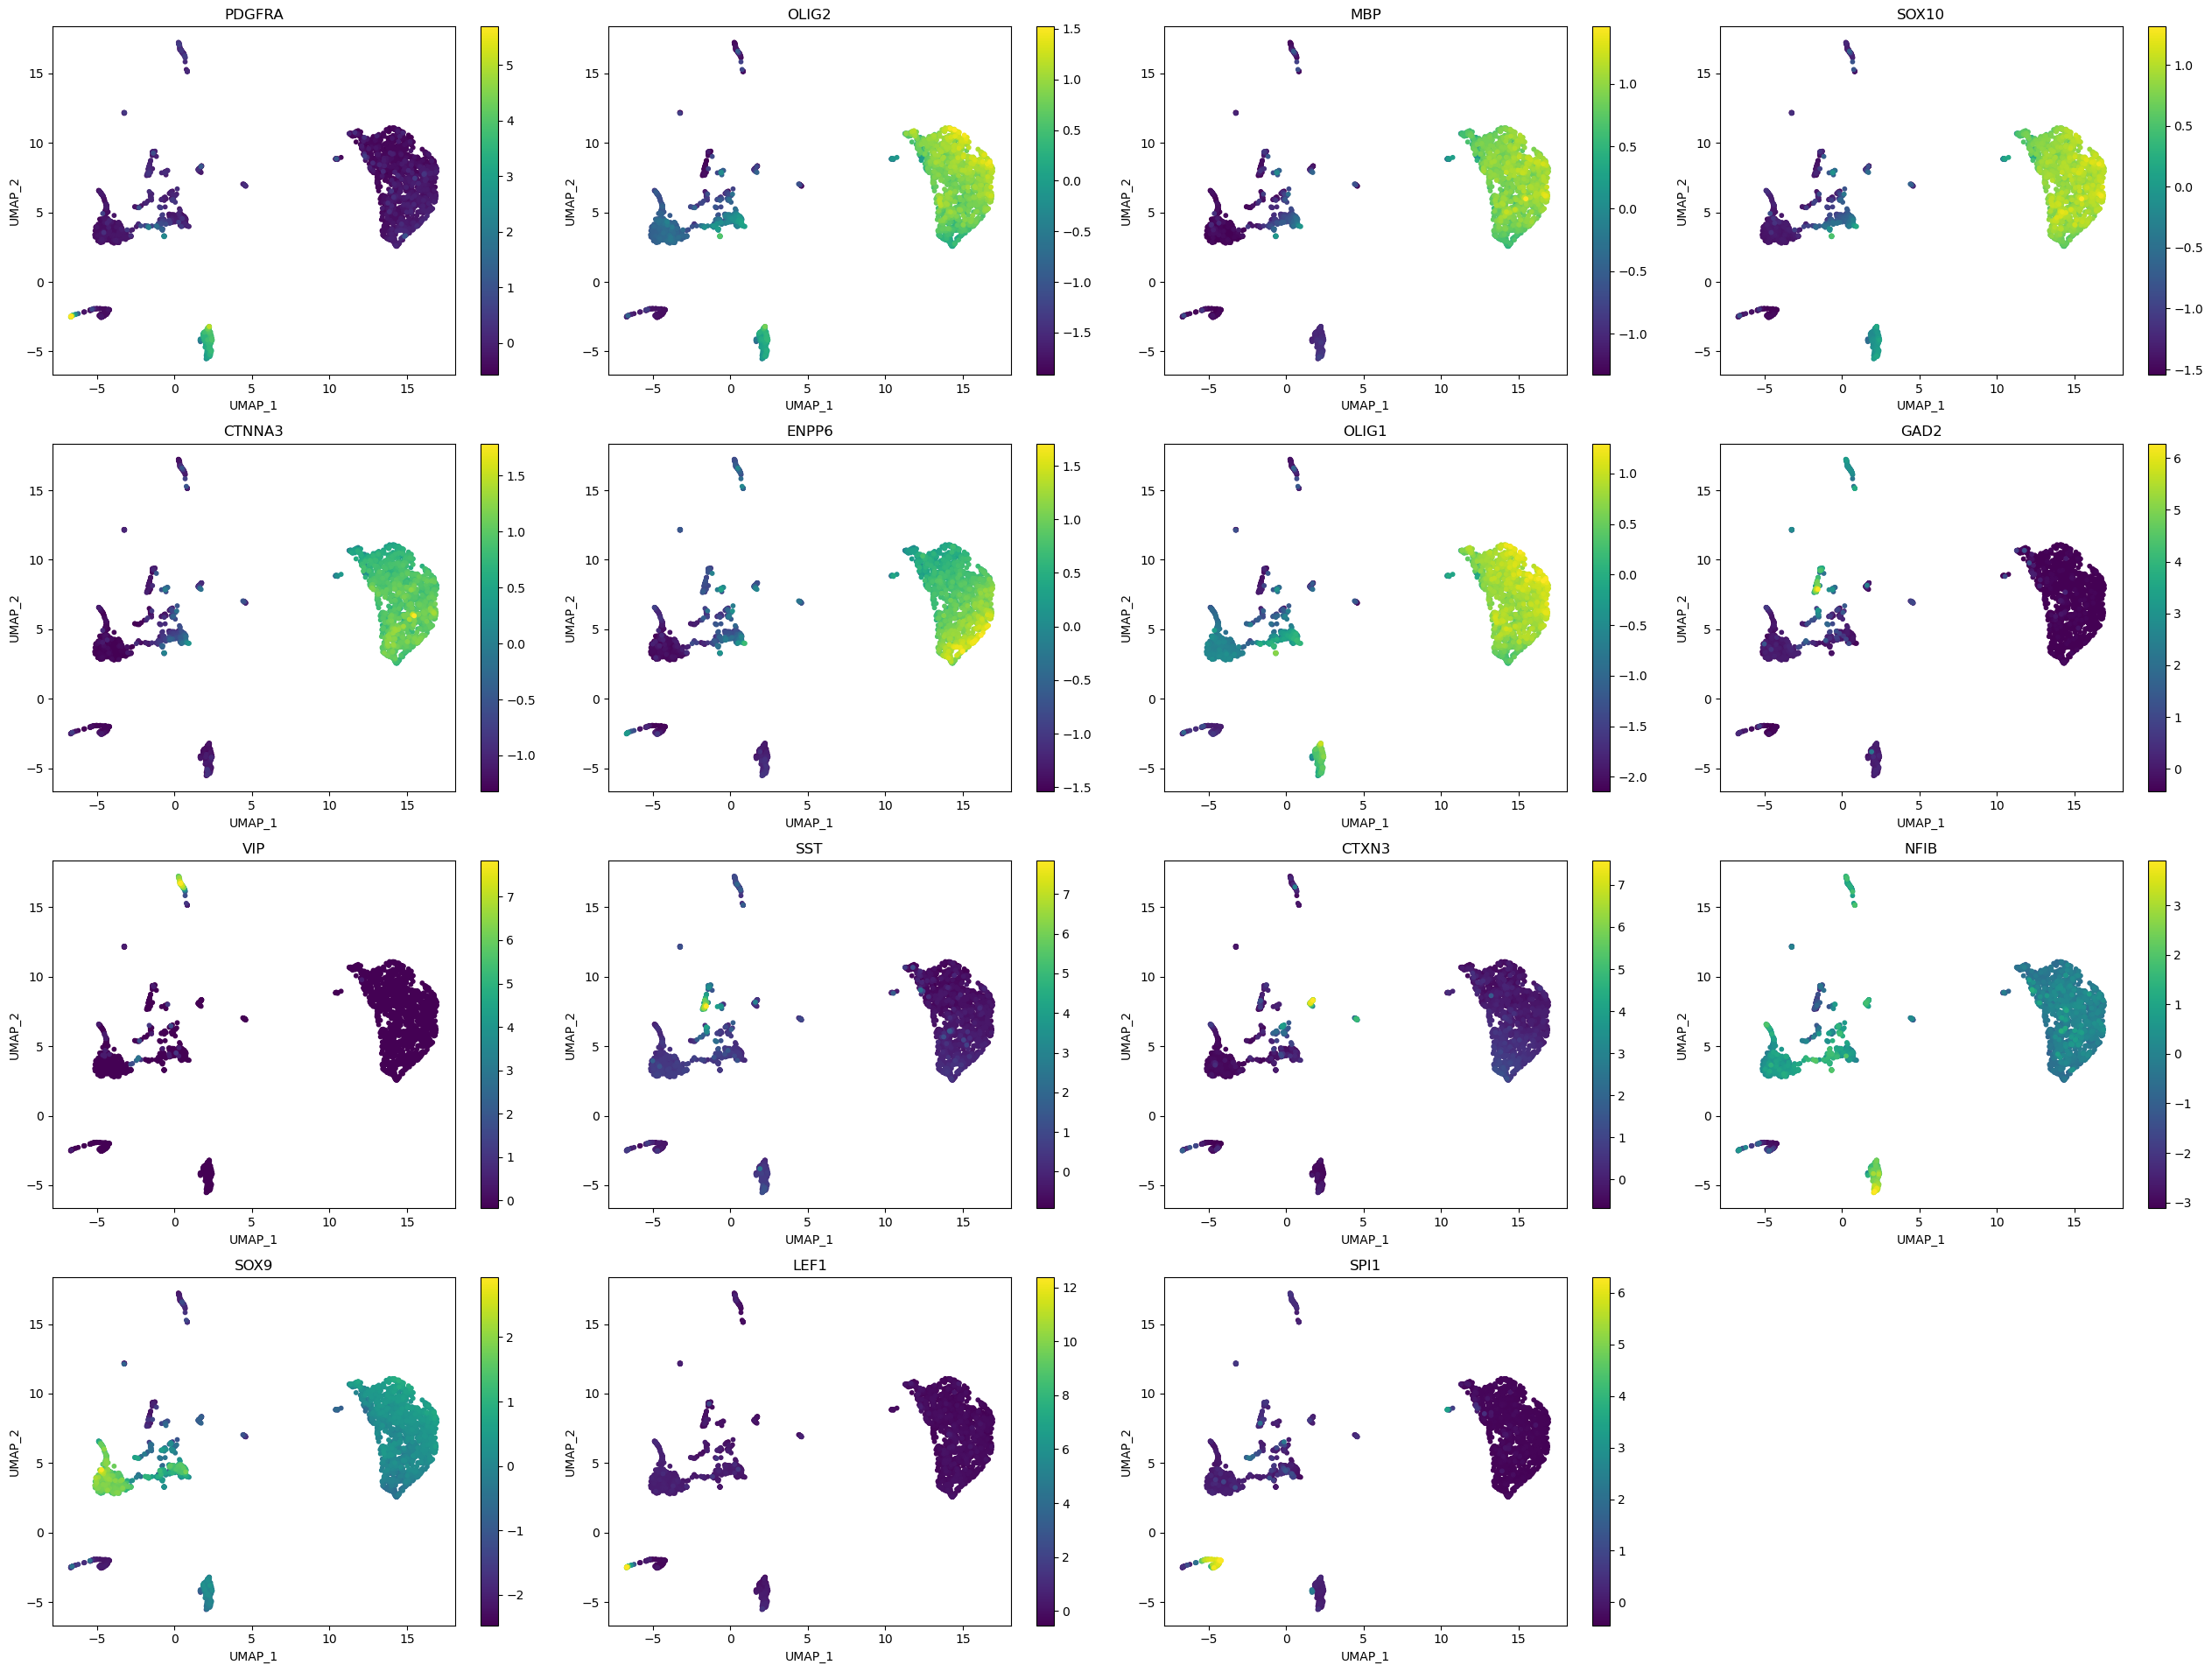

In [76]:
from pycisTopic.clust_vis import plot_imputed_features
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['PDGFRA', 'OLIG2', 'MBP', 'SOX10', # Olig differentiation
              'CTNNA3', 'ENPP6', 'OLIG1', # Olig differentiation
              'GAD2', 'VIP', 'SST', 'CTXN3', # Int
              'NFIB', 'SOX9',  #Ast
              'LEF1', #Endo
              'SPI1'], #Glia
    scale=True,
    num_columns=4
)

In [77]:
print("Number of DAGs found:")
print("---------------------")
for x in DAG_markers_dict:
    print(f"  {x}: {len(DAG_markers_dict[x])}")

Number of DAGs found:
---------------------
  AST: 2316
  BG: 2663
  COP: 599
  ENDO: 2585
  GC: 2898
  GP: 2956
  INH_PVALB: 2571
  INH_SNCG: 2854
  INH_SST: 2853
  INH_VIP: 2793
  MG: 2251
  MGL: 3572
  MOL: 1583
  NFOL: 699
  OPC: 2525
  PURK: 2787


# Label transfer


Agora é necessário criar o arquivo adata.h5ad a partir dos dados de scRNAseq!!

In [78]:
from pycisTopic.label_transfer import label_transfer

In [79]:
import scanpy as sc
rna_anndata = sc.read_h5ad(
    "ppRNAs/adata.h5ad"
).raw.to_adata()
atac_anndata = sc.AnnData(gene_act.mtx.T, obs = pd.DataFrame(index = gene_act.cell_names), var = pd.DataFrame(index = gene_act.feature_names))

In [80]:
atac_anndata.obs["sample_id"] = "10x_multiome_brain"
rna_anndata.obs["sample_id"] = "10x_multiome_brain"

In [81]:
label_dict = label_transfer(
    rna_anndata,
    atac_anndata,
    labels_to_transfer = ['Seurat_cell_type'],
    variable_genes = True,
    methods = ['ingest', 'harmony', 'bbknn', 'scanorama', 'cca'],
    return_label_weights = False,
    _temp_dir= short_temp_dir
)

2026-01-11 15:32:07,754 cisTopic     INFO     Normalizing RNA data


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


2026-01-11 15:32:12,328 cisTopic     INFO     Processing 1 query sample(s) using 1 cpu(s)


2026-01-11 15:32:15,137	INFO worker.py:2014 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(pid=197834) /home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
(pid=197834)   from pkg_resources import DistributionNotFound, get_distribution


(label_transfer_ray pid=197834) 2026-01-11 15:32:17,306 cisTopic     INFO     Normalizing ATAC data from sample 10x_multiome_brain


(label_transfer_ray pid=197834) /home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
(label_transfer_ray pid=197834)   view_to_actual(adata)
(label_transfer_ray pid=197834) /home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/label_transfer.py:241: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
(label_transfer_ray pid=197834)   adata_concat = ref_anndata.concatenate(


(label_transfer_ray pid=197834) 2026-01-11 15:32:25,239 cisTopic     INFO     Running integration with ingest


(label_transfer_ray pid=197834) /home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
(label_transfer_ray pid=197834)   warn(
(label_transfer_ray pid=197834) <frozen _collections_abc>:949: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
(label_transfer_ray pid=197834) <frozen _collections_abc>:949: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
(label_transfer_ray pid=197834) <frozen _collections_abc>:949: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.


(label_transfer_ray pid=197834) 2026-01-11 15:32:54,870 cisTopic     INFO     Running integration with harmony


(label_transfer_ray pid=197834) 2026-01-11 15:32:55,639 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


(label_transfer_ray pid=197834) 2026-01-11 15:32:55,639 harmonypy    INFO     Computing initial centroids with sklearn.KMeans...


(label_transfer_ray pid=197834) 2026-01-11 15:32:56,430 - harmonypy - INFO - sklearn.KMeans initialization complete.
(label_transfer_ray pid=197834) 2026-01-11 15:32:56,449 - harmonypy - INFO - Iteration 1 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:56,430 harmonypy    INFO     sklearn.KMeans initialization complete.
(label_transfer_ray pid=197834) 2026-01-11 15:32:56,449 harmonypy    INFO     Iteration 1 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:56,855 - harmonypy - INFO - Iteration 2 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:56,855 harmonypy    INFO     Iteration 2 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:57,267 - harmonypy - INFO - Iteration 3 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:57,267 harmonypy    INFO     Iteration 3 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:57,674 - harmonypy - INFO - Iteration 4 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:57,674 harmonypy    INFO     Iteration 4 of 10


(label_transfer_ray pid=197834) 2026-01-11 15:32:58,081 - harmonypy - INFO - Converged after 4 iterations
(label_transfer_ray pid=197834) WARNING: consider updating your call to make use of `computation`


(label_transfer_ray pid=197834) 2026-01-11 15:32:58,081 harmonypy    INFO     Converged after 4 iterations
(label_transfer_ray pid=197834) 2026-01-11 15:32:58,176 cisTopic     INFO     Running integration with bbknn
(label_transfer_ray pid=197834) 2026-01-11 15:33:03,733 cisTopic     INFO     Running integration with scanorama
(label_transfer_ray pid=197834) Found 1481 genes among all datasets
(label_transfer_ray pid=197834) [[0.         0.34224411]
(label_transfer_ray pid=197834)  [0.         0.        ]]
(label_transfer_ray pid=197834) Processing datasets (0, 1)


(label_transfer_ray pid=197834) /home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/anndata/_core/anndata.py:787: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
(label_transfer_ray pid=197834)   getattr(self, attr).index = value


(label_transfer_ray pid=197834) 2026-01-11 15:33:07,291 cisTopic     INFO     Running integration with cca


In [82]:
label_dict_x=[label_dict[key] for key in label_dict.keys()]
label_pd = pd.concat(label_dict_x, axis=1, sort=False)
label_pd.index = cistopic_obj.cell_names
label_pd.columns = ['pycisTopic_' + x for x in label_pd.columns]
cistopic_obj.add_cell_data(label_pd, split_pattern = '-')

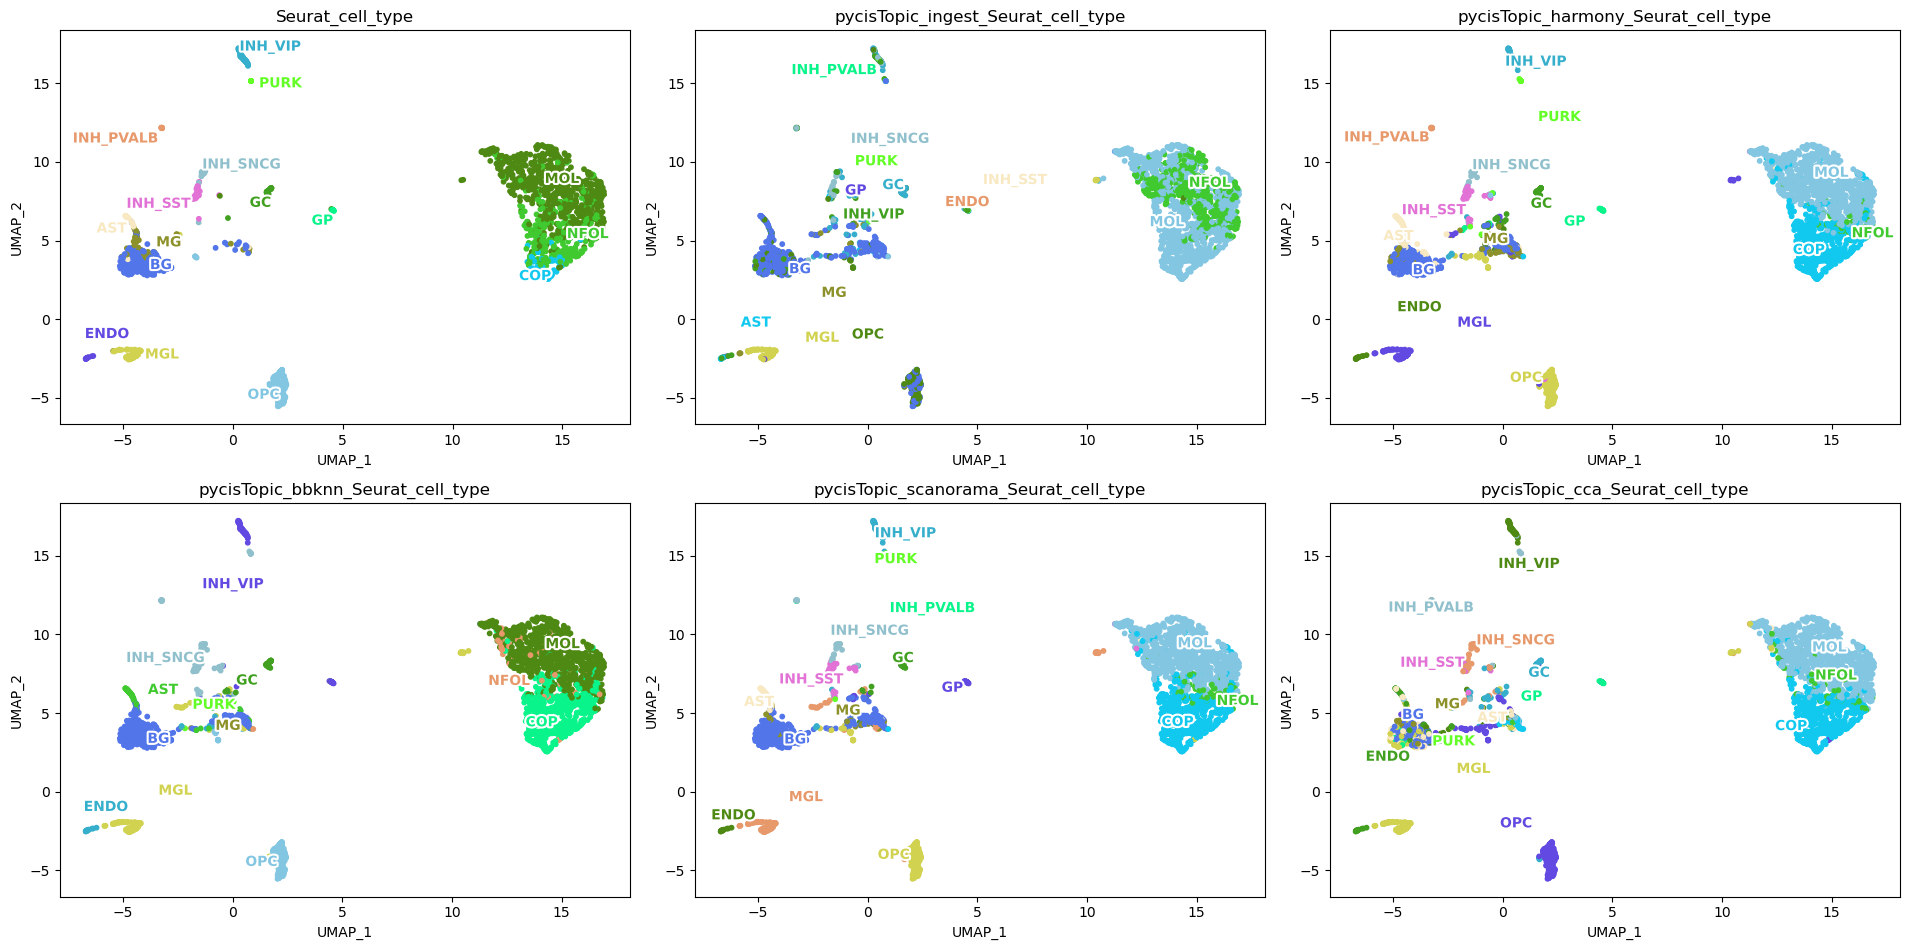

In [83]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['Seurat_cell_type'] + label_pd.columns.to_list(),
    remove_nan=True,
    seed=555,
    num_columns=3)

/tmp/ipykernel_54831/1064064997.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


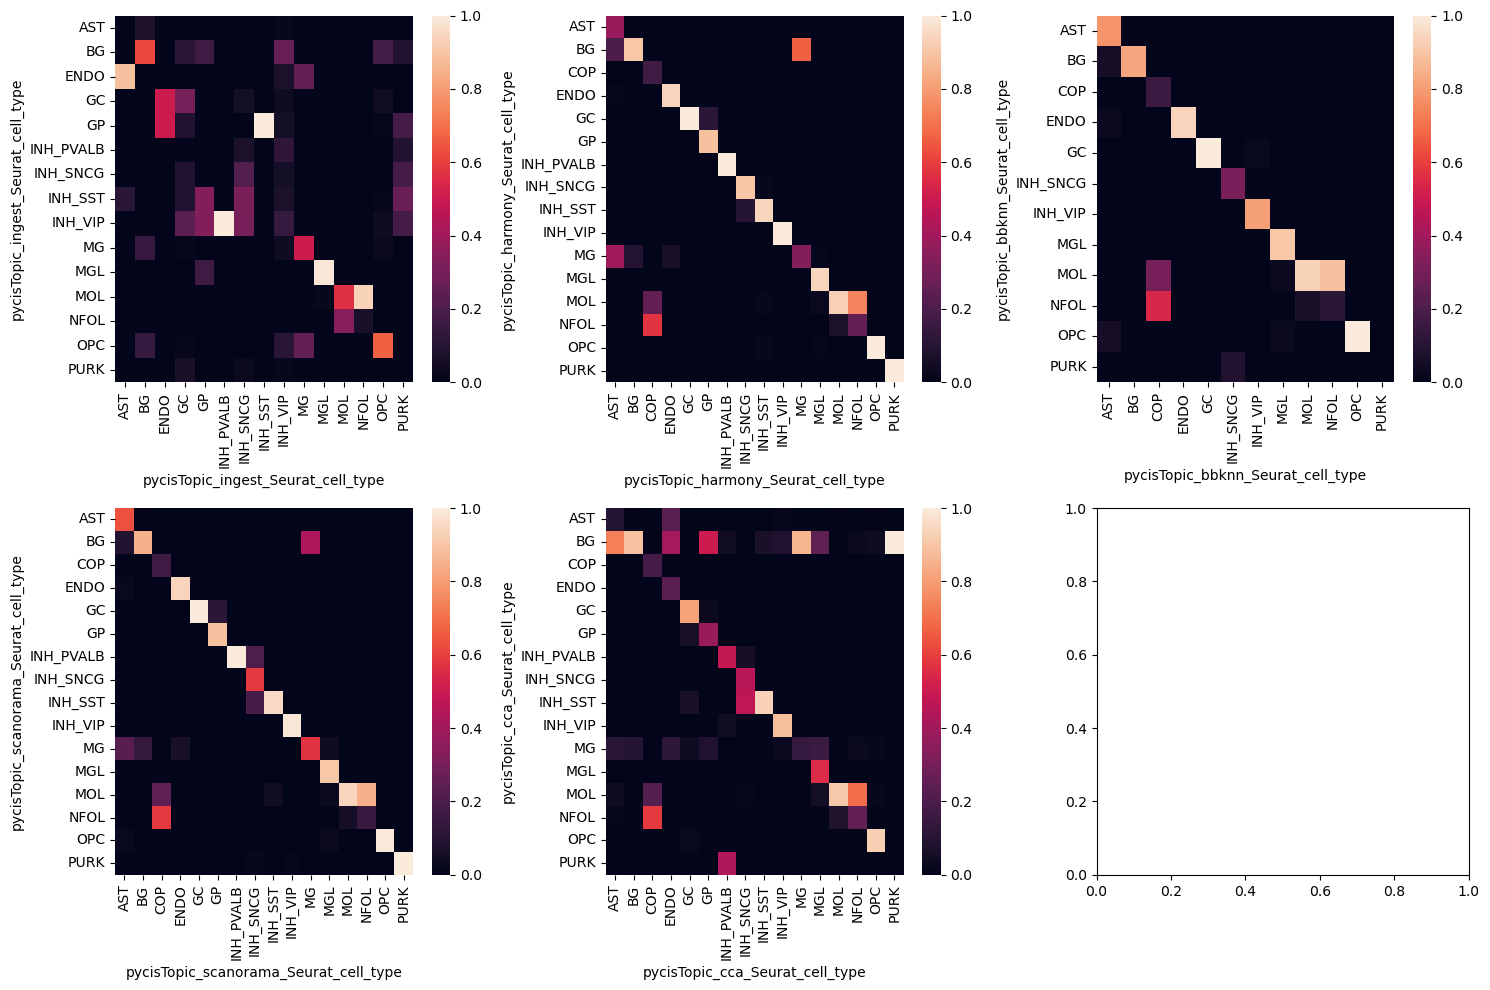

In [84]:
import seaborn as sns
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (3 * 5, 2 * 5))
for method, ax in zip(label_pd.columns.to_list(), axs.ravel()):
    conf_mat = pd.crosstab(cistopic_obj.cell_data["Seurat_cell_type"], cistopic_obj.cell_data[method])
    conf_mat = conf_mat / conf_mat.sum()
    sns.heatmap(conf_mat.loc[conf_mat.columns], ax = ax)
fig.tight_layout()
fig.show()

# EXPORTING TO LOOM

In [85]:
from pycisTopic.loom import export_region_accessibility_to_loom, export_gene_activity_to_loom

In [86]:
cluster_markers = {'Seurat_cell_type': markers_dict}

In [87]:
os.makedirs(os.path.join(out_dir, "loom"), exist_ok=True)

In [88]:
export_region_accessibility_to_loom(
    accessibility_matrix = imputed_acc_obj,
    cistopic_obj = cistopic_obj,
    binarized_topic_region = region_bin_topics_otsu,
    binarized_cell_topic = binarized_cell_topic,
    selected_cells = cistopic_obj.projections['cell']['UMAP'].index.tolist(),
    out_fname = os.path.join(out_dir, "loom", "10x_multiome_brain_pycisTopic_region_accessibility.loom"),
    cluster_annotation = ['Seurat_cell_type'],
    cluster_markers = cluster_markers,
    tree_structure = ('10x_multiome_brain', 'pycisTopic', 'noDBL_all'),
    title = 'Tutorial - Region accessibility all',
    nomenclature = "hg38",
    split_pattern = '-'
)

2026-01-11 15:38:20,474 cisTopic     INFO     Creating minimal loom


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/pycisTopic/loom.py:845: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


2026-01-11 15:39:59,898 cisTopic     INFO     Adding annotations
2026-01-11 15:40:21,797 cisTopic     INFO     Adding clusterings
2026-01-11 15:40:21,869 cisTopic     INFO     Adding markers
No markers for  nan
2026-01-11 15:40:30,549 cisTopic     INFO     Exporting


/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/loomxpy/loomxpy.py:459: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")
/home/victorffernandes/miniforge3/envs/scenicplus_obj_ofc/lib/python3.11/site-packages/loomxpy/loomxpy.py:437: FutureWarning: The default value of regex will change from True to False in a future version.
  regulons.columns = regulons.columns.str.replace("_?\\(", "_(")


In [89]:
cistopic_obj.cell_data['Seurat_cell_type'] = (
    cistopic_obj.cell_data['Seurat_cell_type']
    .fillna('Unknown')
    .astype(str)
)

In [90]:
export_gene_activity_to_loom(
    gene_activity_matrix = gene_act,
    cistopic_obj = cistopic_obj,
    out_fname = os.path.join(out_dir, "loom", "10x_multiome_brain_pycisTopic_gene_activity.loom"),
    cluster_annotation = ['Seurat_cell_type'],
    cluster_markers = cluster_markers,
    tree_structure = ('10x_multiome_brain', 'pycisTopic', 'ATAC'),
    title = 'Tutorial - Gene activity',
    nomenclature = "hg38",
    split_pattern = '-'
)

2026-01-11 15:42:31,098 cisTopic     INFO     Creating minimal loom
2026-01-11 15:42:36,491 cisTopic     INFO     Adding annotations
2026-01-11 15:42:37,609 cisTopic     INFO     Adding clusterings
2026-01-11 15:42:37,632 cisTopic     INFO     Adding markers
No markers for  Unknown
2026-01-11 15:42:37,908 cisTopic     INFO     Exporting
